<a href="https://colab.research.google.com/github/rizky-gumelar/Certificate-Generator/blob/master/Comparison_of_N_Heterocyclic_Corrosion_Inhibitor_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N-Heterocyclic Corrosion Inhibitor**

## **Install Package**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pandas_dq
from pandas_dq import dq_report,Fix_DQ

## **Connect Dataset & Preprocessing**

In [ ]:
# Connect Colab dengan GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Datasets/N-Heterocyclic.xlsx')
dataset.head()


HOMO   LUMO   Gap Energy  Dipole Moment  Ionization Potential  \
0 -6.120 -1.852     4.268        3.425              6.996          
1 -6.034 -1.788     4.246        2.976              6.749          
2 -6.048 -1.809     4.239        3.872              7.561          
3 -6.091 -1.710     4.381        4.252              6.928          
4 -5.954 -1.728     4.226        2.437              6.525          

   Electron Affinity  Electronegativity  Global Hardness  Global Softness  \
0        1.446              4.221             2.775            0.360        
1        1.404              4.076             2.673            0.374        
2        1.427              4.494             3.067            0.326        
3        1.321              4.125             2.804            0.357        
4        1.366              3.946             2.579            0.388        

   Electrophilicity  Fraction of electron transferred  IE (%)  
0        3.211                     0.501                13.0   
1        3.109                     0.547                19.0   
2        3.292                     0.409                14.0   
3        3.034                     0.513                24.0   
4        3.018                     0.592                26.0

In [ ]:
df = dataset.copy()
print("Info Dataset")
df.info()

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOMO                              218 non-null    float64
 1   LUMO                              218 non-null    float64
 2   Gap Energy                        218 non-null    float64
 3   Dipole Moment                     218 non-null    float64
 4   Ionization Potential              218 non-null    float64
 5   Electron Affinity                 218 non-null    float64
 6   Electronegativity                 218 non-null    float64
 7   Global Hardness                   218 non-null    float64
 8   Global Softness                   218 non-null    float64
 9   Electrophilicity                  218 non-null    float64
 10  Fraction of electron transferred  218 non-null    float64
 11  IE (%)                            218 non-null    float64


In [ ]:
dq_report(df,verbose=1)

    All variables classified into correct types.


Data Type  Missing Values% Unique Values%  \
HOMO                               float64        0.0             NA         
LUMO                               float64        0.0             NA         
Gap Energy                         float64        0.0             NA         
Dipole Moment                      float64        0.0             NA         
Ionization Potential               float64        0.0             NA         
Electron Affinity                  float64        0.0             NA         
Electronegativity                  float64        0.0             NA         
Global Hardness                    float64        0.0             NA         
Global Softness                    float64        0.0             NA         
Electrophilicity                   float64        0.0             NA         
Fraction of electron transferred   float64        0.0             NA         
IE (%)                             float64        0.0             NA         

                                  Minimum Value  Maximum Value  \
HOMO                                  -7.945       -4.477000     
LUMO                               -2614.000        6.294000     
Gap Energy                             1.897       13.536000     
Dipole Moment                          0.010       13.371000     
Ionization Potential                  -4.650        8.933000     
Electron Affinity                     -6.294        4.655000     
Electronegativity                     -0.098        5.971000     
Global Hardness                        0.949        6.768000     
Global Softness                       -2.250        1.054000     
Electrophilicity                      -1.212       19.775674     
Fraction of electron transferred      -0.831        1.238000     
IE (%)                                13.000       98.800000     

                                                                                                                                                    DQ Issue                                                                                                                     
HOMO                                                                                                                                                          Column has 5 outliers greater than upper bound (-4.76) or lower than lower bound(-7.51). Cap them or remove them.  
LUMO                                                                                                                                                         Column has 34 outliers greater than upper bound (-0.42) or lower than lower bound(-3.68). Cap them or remove them.  
Gap Energy                                                                                                                                                     Column has 27 outliers greater than upper bound (6.38) or lower than lower bound(1.77). Cap them or remove them.  
Dipole Moment                                                                                                                                                  Column has 7 outliers greater than upper bound (9.26) or lower than lower bound(-1.53). Cap them or remove them.  
Ionization Potential                                                                                                                                           Column has 18 outliers greater than upper bound (7.89) or lower than lower bound(4.39). Cap them or remove them.  
Electron Affinity                                                           Column has 29 outliers greater than upper bound (3.82) or lower than lower bound(0.05). Cap them or remove them., Column has a high correlation with ['Gap Energy']. Consider dropping one of them.  
Electronegativity                                      Column has 34 outliers greater than upper bound (5.04) or lower than lower bound(3.12). Cap them or remove them., Column has a high correlation with ['Gap Energy', 'Electron Affinity']. 

In [ ]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    kondisi_lower_than = df[col] < minimum
    kondisi_more_than = df[col] > maximum

    # df[col] = df[col].mask(kondisi_more_than, maximum)
    # df[col] = df[col].mask(kondisi_lower_than, minimum)

    df.drop(df[kondisi_lower_than].index, inplace=True)
    df.drop(df[kondisi_more_than].index, inplace=True)

<ipython-input-35-00b14db31160>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)
<ipython-input-35-00b14db31160>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)
<ipython-input-35-00b14db31160>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)
<ipython-input-35-00b14db31160>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)
<ipython-input-35-00b14db31160>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)
<ipython-input-35-00b14db31160>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)


In [ ]:
#Cek apakah terdapat missing value
print("Cek data kosong")
df.isnull().sum()

Cek data kosong


HOMO                                0
LUMO                                0
Gap Energy                          0
Dipole Moment                       0
Ionization Potential                0
Electron Affinity                   0
Electronegativity                   0
Global Hardness                     0
Global Softness                     0
Electrophilicity                    0
Fraction of electron transferred    0
IE (%)                              0
dtype: int64

In [ ]:
#Cek apakah terdapat data duplikat
print("Cek data duplikat")
df.duplicated().sum()

Cek data duplikat


0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe(include='all').T

count    mean        std      min     25%   \
HOMO                              125.0  -6.056944  0.440478  -7.190  -6.371   
LUMO                              125.0  -2.202984  0.378500  -3.170  -2.477   
Gap Energy                        125.0   3.858600  0.593249   2.727   3.399   
Dipole Moment                     125.0   4.172033  1.973792   0.539   2.820   
Ionization Potential              125.0   6.144616  0.457834   5.292   5.839   
Electron Affinity                 125.0   2.136664  0.381924   0.940   1.902   
Electronegativity                 125.0   4.140640  0.293240   3.456   3.926   
Global Hardness                   125.0   2.010344  0.314929   1.363   1.815   
Global Softness                   125.0   0.509928  0.082221   0.348   0.449   
Electrophilicity                  125.0   2.471345  2.725003  -1.104  -0.960   
Fraction of electron transferred  125.0   0.531424  0.225427   0.119   0.290   
IE (%)                            125.0  88.124000  8.921814  58.600  84.000   

                                    50%     75%      max     
HOMO                              -5.966  -5.759  -5.068000  
LUMO                              -2.240  -1.931  -1.264000  
Gap Energy                         3.819   4.151   5.360000  
Dipole Moment                      3.867   5.462   9.286000  
Ionization Potential               6.081   6.392   7.298000  
Electron Affinity                  2.124   2.390   3.004000  
Electronegativity                  4.117   4.305   4.872000  
Global Hardness                    1.978   2.228   2.869000  
Global Softness                    0.505   0.551   0.734000  
Electrophilicity                   3.471   4.202  10.121739  
Fraction of electron transferred   0.598   0.704   0.946000  
IE (%)                            91.200  94.900  98.800000

In [ ]:
df.skew()

HOMO                               -0.448030
LUMO                                0.088837
Gap Energy                          0.214465
Dipole Moment                       0.490451
Ionization Potential                0.440341
Electron Affinity                  -0.227166
Electronegativity                   0.583351
Global Hardness                     0.201411
Global Softness                     0.574446
Electrophilicity                    0.071913
Fraction of electron transferred   -0.312968
IE (%)                             -1.182530
dtype: float64

Range HOMO: 3.468


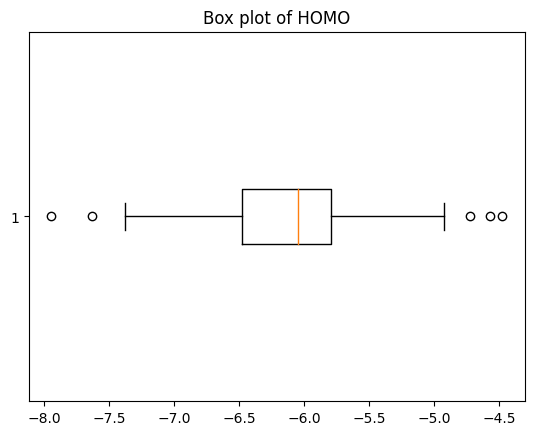

Range LUMO: 2620.294


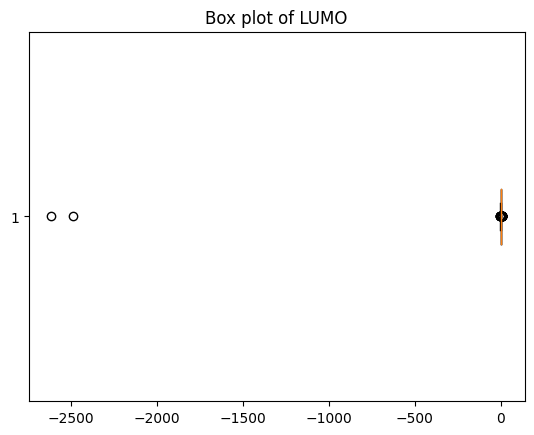

Range Gap Energy: 11.639


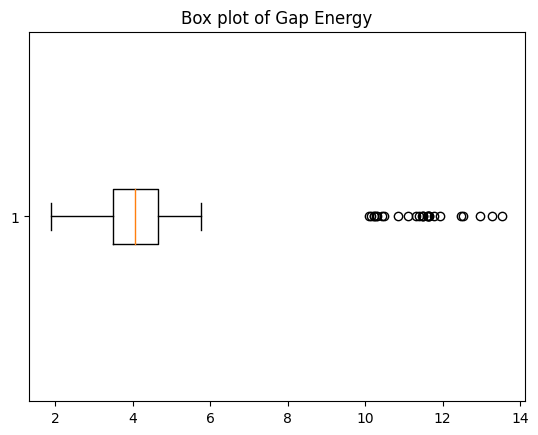

Range Dipole Moment: 13.361


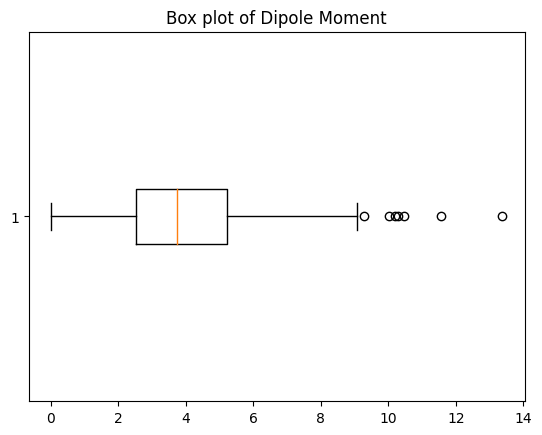

Range Ionization Potential: 13.583


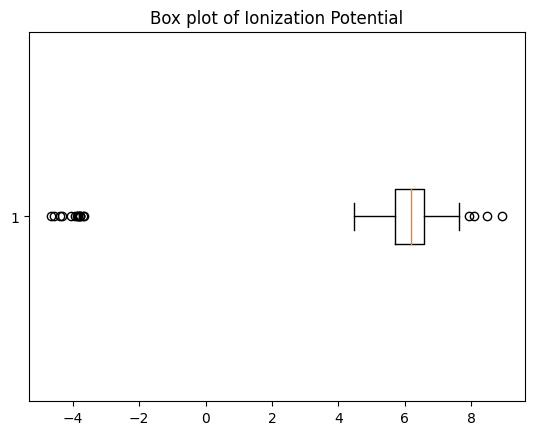

Range Electron Affinity: 10.949


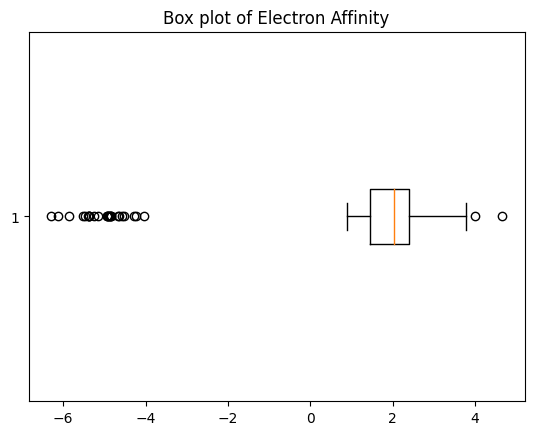

Range Electronegativity: 6.069


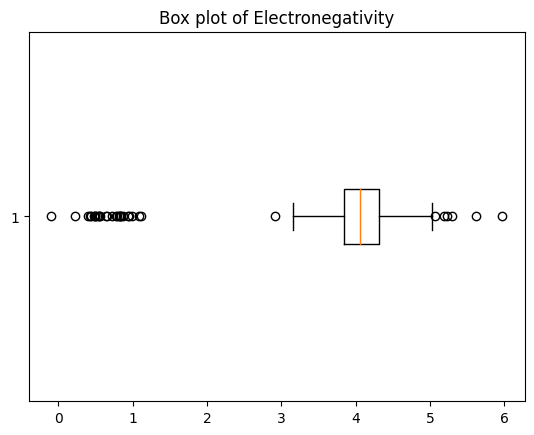

Range Global Hardness: 5.819


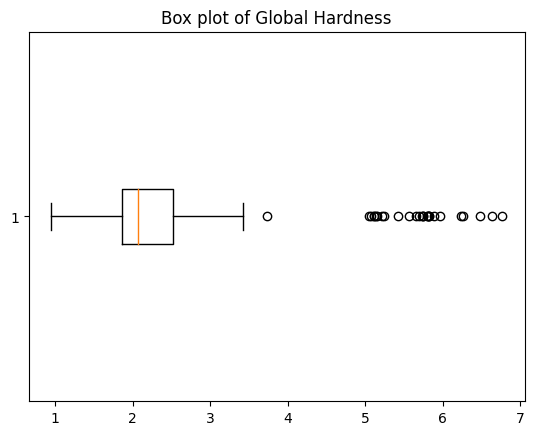

Range Global Softness: 3.3040000000000003


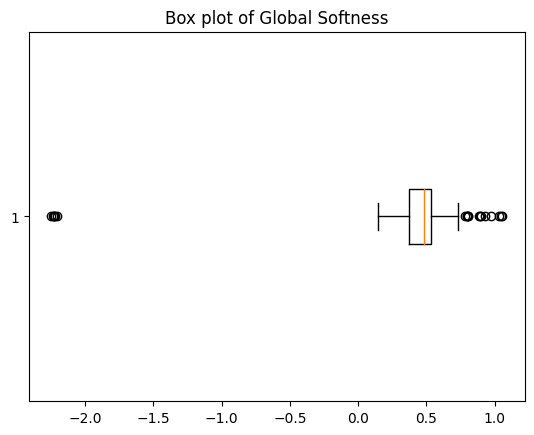

Range Electrophilicity: 20.98767410071942


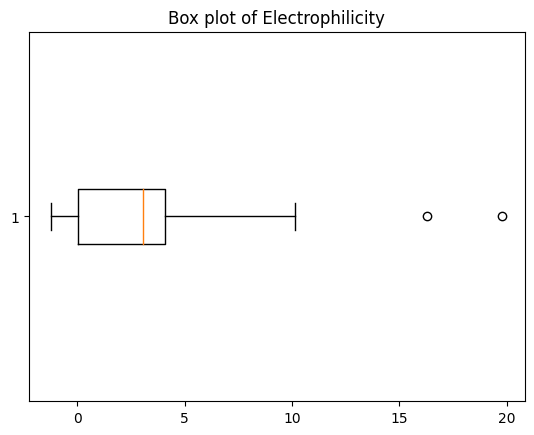

Range Fraction of electron transferred: 2.069


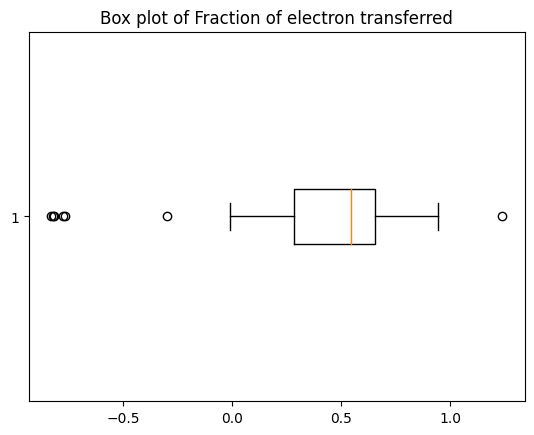

Range IE (%): 85.8


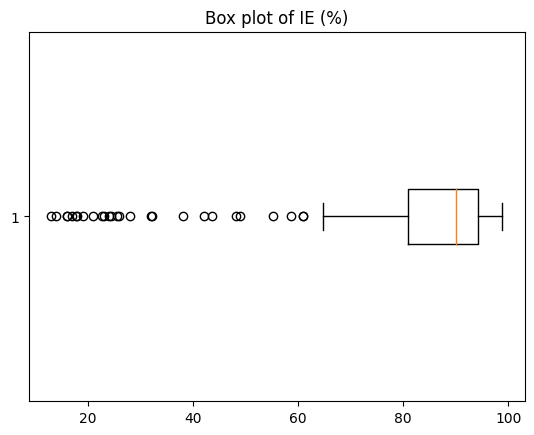

In [ ]:
for column in df.select_dtypes(include=[np.number]).columns:
    # Melihat range pada kolom numerik
    print(f'Range {column}:', df[column].max() - df[column].min())

    # Membuat box plot pada kolom numerik
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box plot of {column}')
    plt.show()

Range HOMO: 2.1220000000000008
Range LUMO: 1.906
Range Gap Energy: 2.6330000000000005
Range Dipole Moment: 8.747
Range Ionization Potential: 2.0060000000000002
Range Electron Affinity: 2.064
Range Electronegativity: 1.416
Range Global Hardness: 1.5060000000000002
Range Global Softness: 0.386
Range Electrophilicity: 11.22573938
Range Fraction of electron transferred: 0.827
Range IE (%): 40.199999999999996


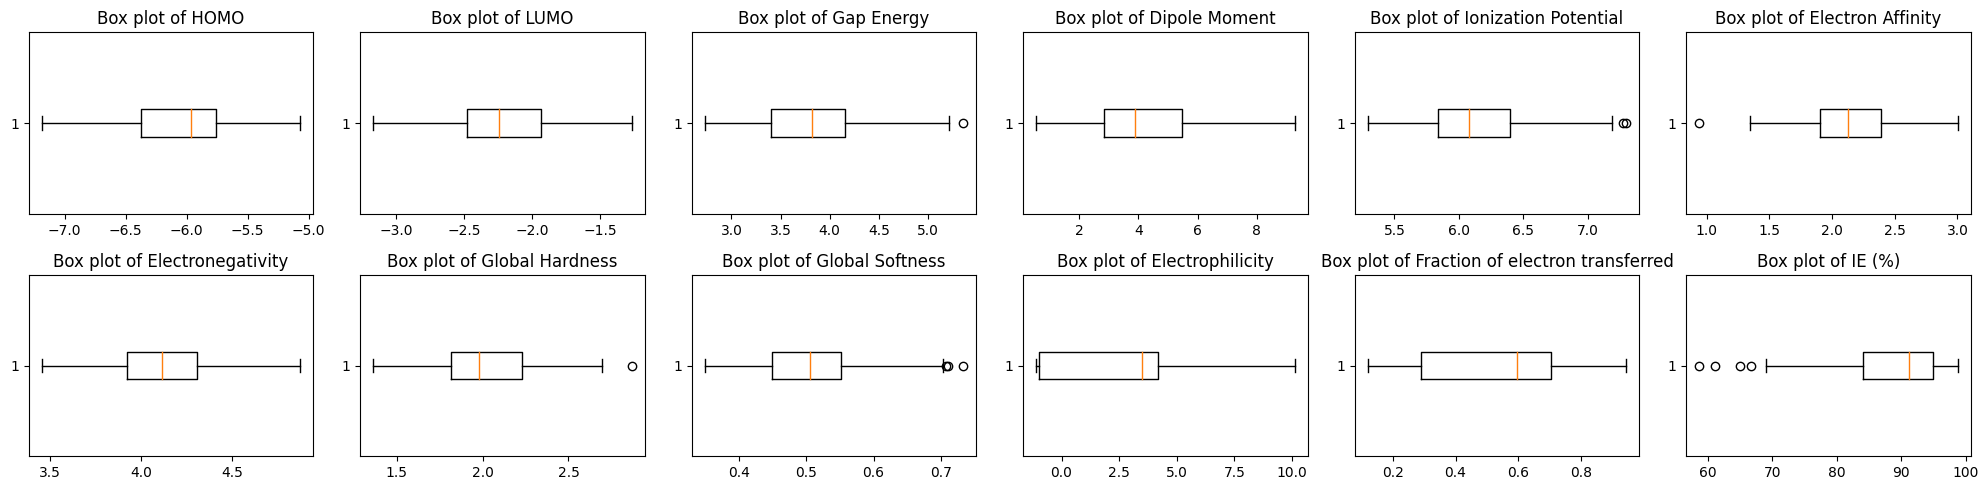

In [ ]:
# Mendapatkan kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Menentukan ukuran subplot
n_cols = 6
n_rows = 2

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5))
axes = axes.flatten()

# Iterasi untuk setiap kolom numerik dan plot boxplot pada subplot
for i, column in enumerate(numeric_columns):
    # Menghitung range pada kolom numerik
    column_range = df[column].max() - df[column].min()
    print(f'Range {column}:', column_range)

    # Membuat box plot pada kolom numerik
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(f'Box plot of {column}')

# Menyembunyikan axis yang kosong jika jumlah kolom numerik kurang dari jumlah subplot
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Mengatur layout agar tidak overlap
plt.tight_layout()
plt.show()

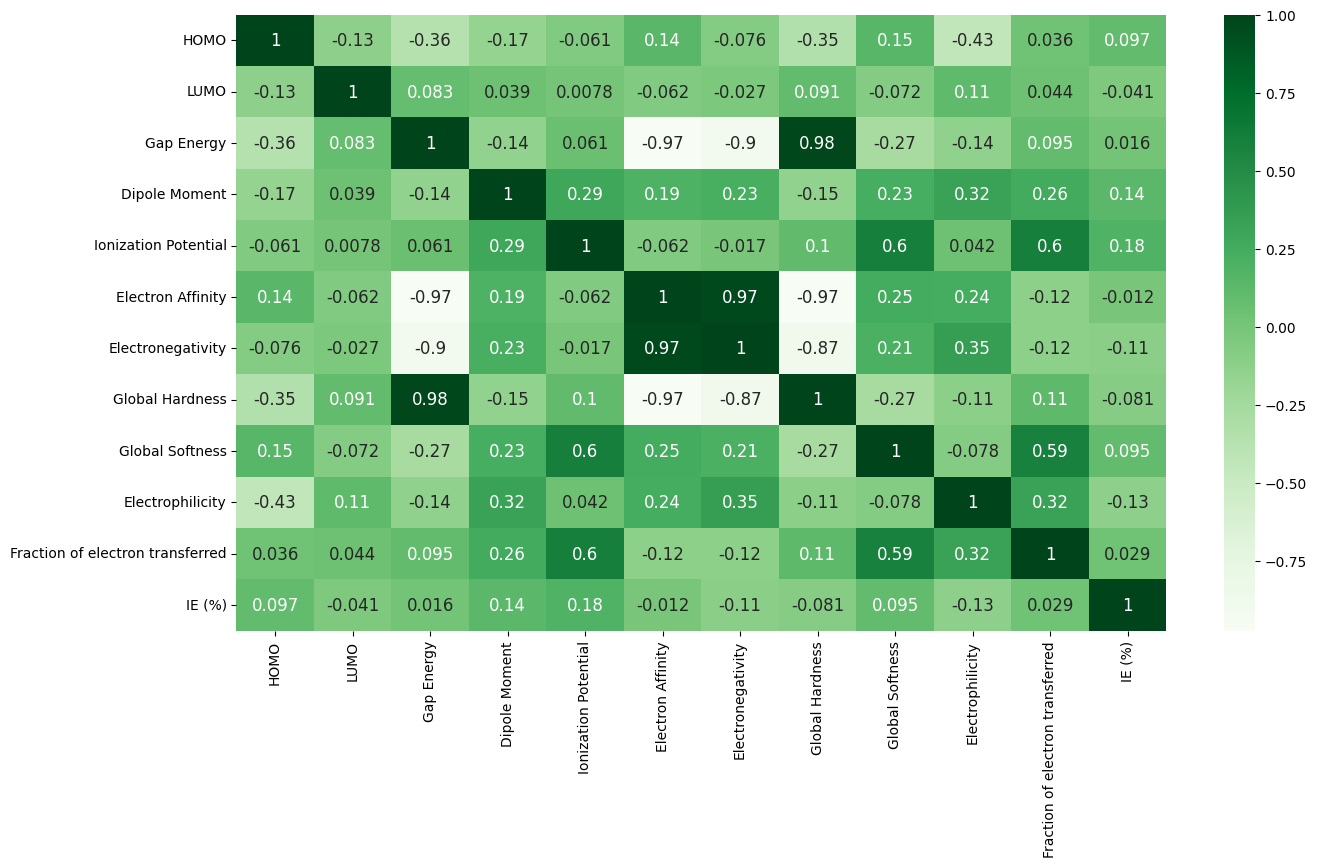

In [ ]:
matriksCorr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(matriksCorr, cmap='Greens', annot=True, annot_kws={'fontsize': 12})

plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('mae') < 5:
                print("\nReached 95% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True


# **ANN**

In [ ]:
X = df.drop('IE (%)', axis=1).values
y = df['IE (%)'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 11)
(25, 11)
(100,)
(25,)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#callbacks = myCallback()

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)  # Output layer untuk regresi
# ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
# model.fit(X_train_scaled, y_train, epochs=100, verbose=1)
history = model.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test), ) #callbacks=[callbacks]

# # Evaluate the model
y_train_pred = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f'Train')
print(f'MSE: {mse_train}')
print(f'MAE: {mae_train}')
print(f'R2: {r2_train}')
print(f'RMSE: {rmse_train}')
print(f'---------------')

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Test')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065 (62.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [=

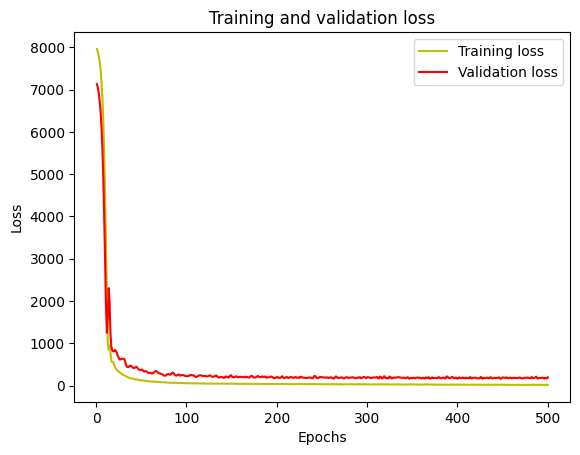

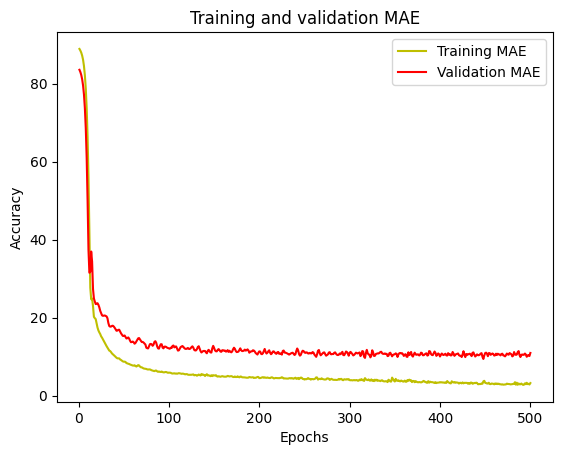

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 36ms/step
Predicted values are:  [[92.6966  ]
 [72.20471 ]
 [91.0536  ]
 [84.383286]
 [93.078865]]
Real values are:  [92.7  88.   96.   89.9  69.05]


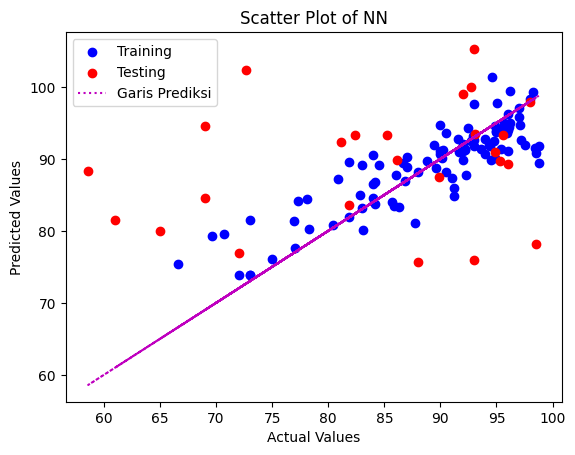

In [ ]:
  # Buat visualisasi hasil prediksi
  plt.scatter(y_train, y_train_pred, color='b', label='Training')
  plt.scatter(y_test, y_pred, color='r', label='Testing')
  plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(f'Scatter Plot of NN')  # Modifikasi di sini
  plt.legend()
  plt.show()

# **Linear**

## Multi Linear Regression

Linear Regression Fold-1:
MSE: 61.67749550402988
MAE: 6.1261043442512415
RMSE: 7.853502117146839
R^2: 0.22086524280664377
------------------


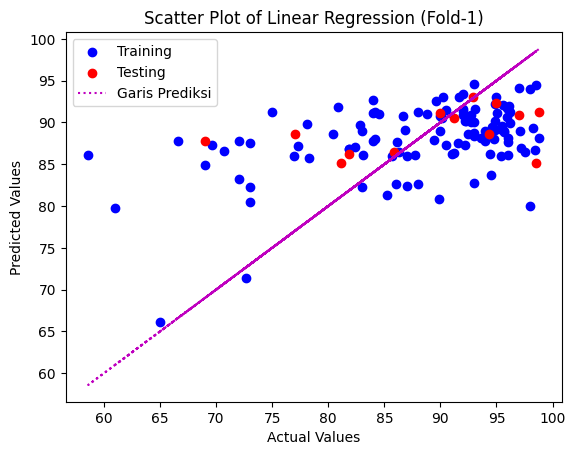

Linear Regression Fold-2:
MSE: 58.86375429403363
MAE: 5.948056955052414
RMSE: 7.6722717818149295
R^2: 0.27134512405800315
------------------


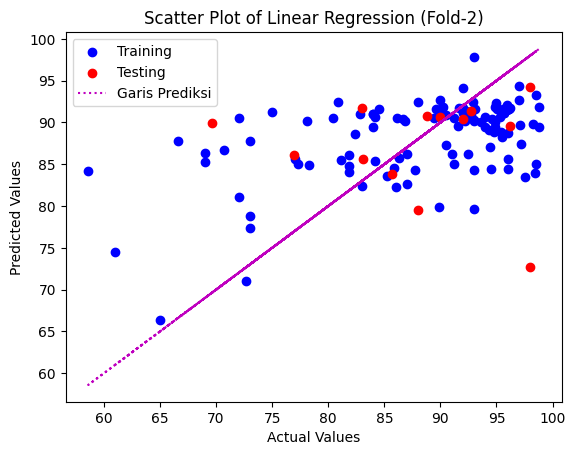

Linear Regression Fold-3:
MSE: 59.42996192654626
MAE: 6.113046196799508
RMSE: 7.709083079494361
R^2: 0.1882696165516422
------------------


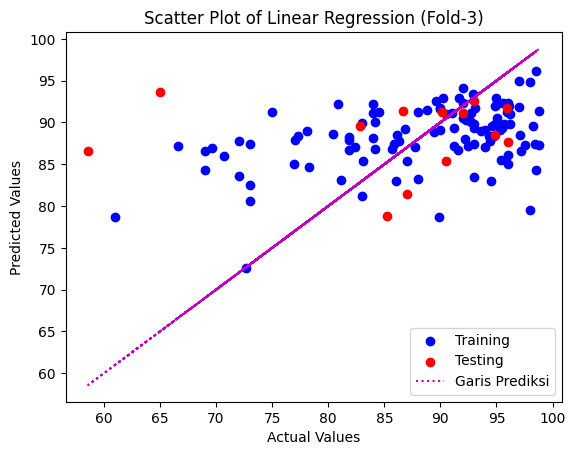

Linear Regression Fold-4:
MSE: 59.527926227364624
MAE: 5.87541653475578
RMSE: 7.715434286374593
R^2: 0.22868112836935117
------------------


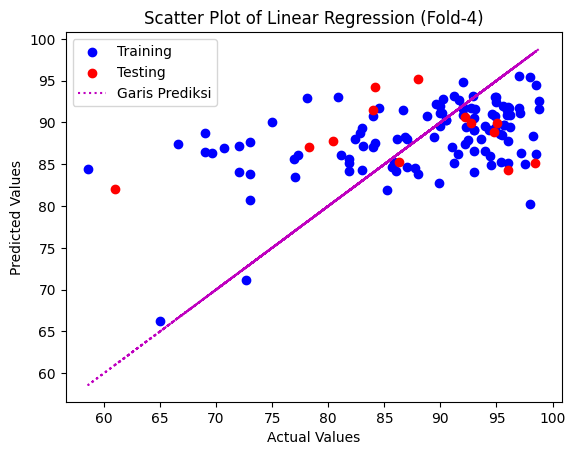

Linear Regression Fold-5:
MSE: 64.03309230575111
MAE: 6.240431743304931
RMSE: 8.002068001819975
R^2: 0.22437980133770274
------------------


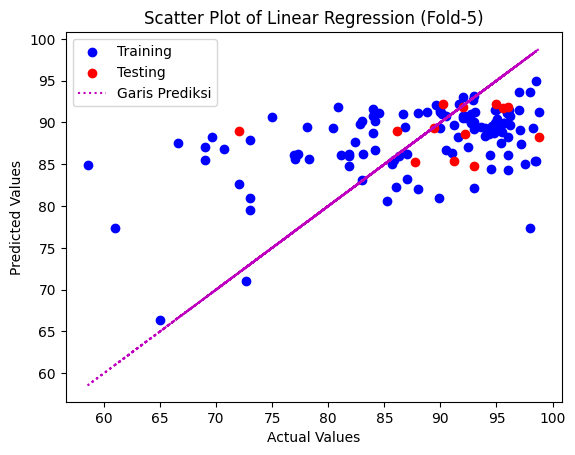

Linear Regression Fold-6:
MSE: 63.205764165614696
MAE: 6.114849528188861
RMSE: 7.950205290784301
R^2: 0.2113152024263828
------------------


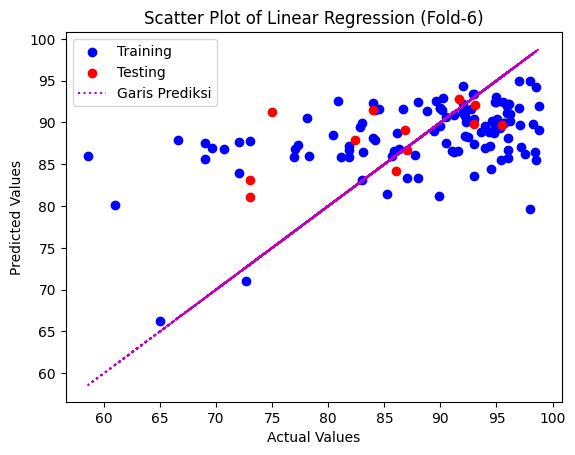

Linear Regression Fold-7:
MSE: 61.500422183570954
MAE: 6.047666868198013
RMSE: 7.842220488074213
R^2: 0.20880910628001903
------------------


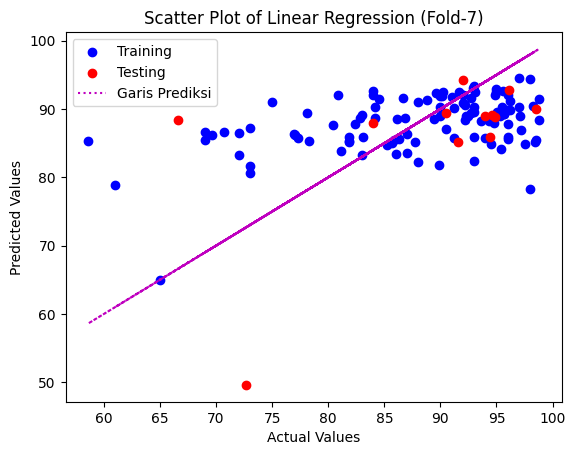

Linear Regression Fold-8:
MSE: 60.18882149132967
MAE: 5.923223533513357
RMSE: 7.758145493049848
R^2: 0.24856000201622797
------------------


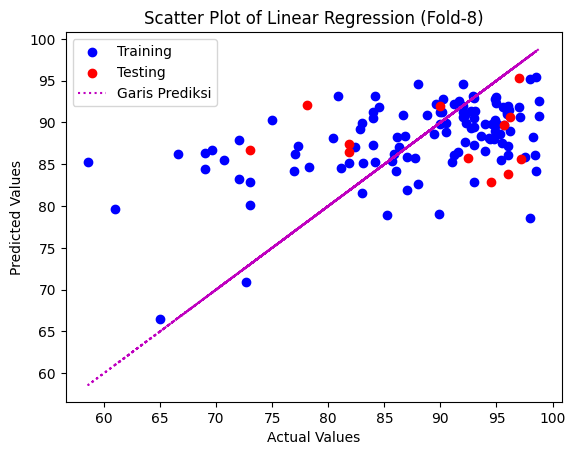

Linear Regression Fold-9:
MSE: 61.719800106490304
MAE: 5.979755690845125
RMSE: 7.8561950145404555
R^2: 0.23478267468262537
------------------


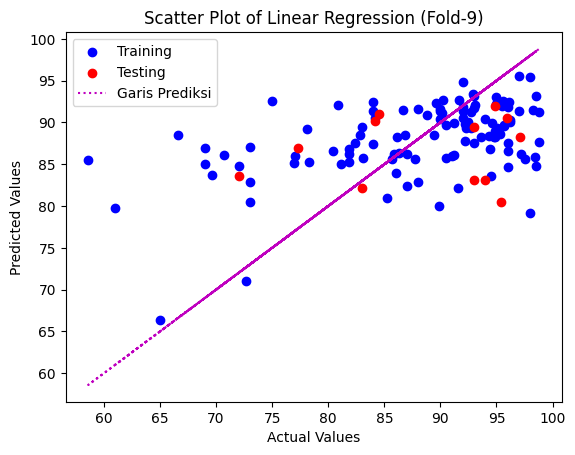

Linear Regression Fold-10:
MSE: 58.06703193701117
MAE: 5.819634327240361
RMSE: 7.620172697321969
R^2: 0.2532971780981551
------------------


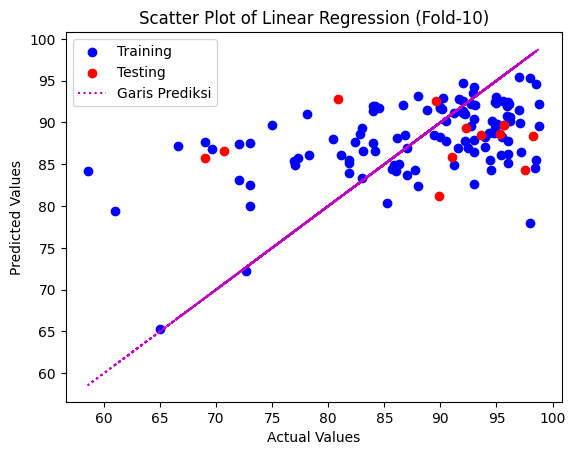

Rata-rata:
Mean MSE: 60.821407014174234
Mean MAE: 6.0188185722149585
Mean RMSE: 7.797929825042149
Mean R^2: 0.22903050766267535


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model LR
model_lr = LinearRegression()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_lr.fit(X_train, y_train)
    y_train_pred = model_lr.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_lr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Linear Regression Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Linear Regression (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Ridge

Ridge Fold-1:
MSE: 67.8513167778668
MAE: 6.458904972297532
RMSE: 8.237191073288685
R^2: 0.1428750666518449
------------------


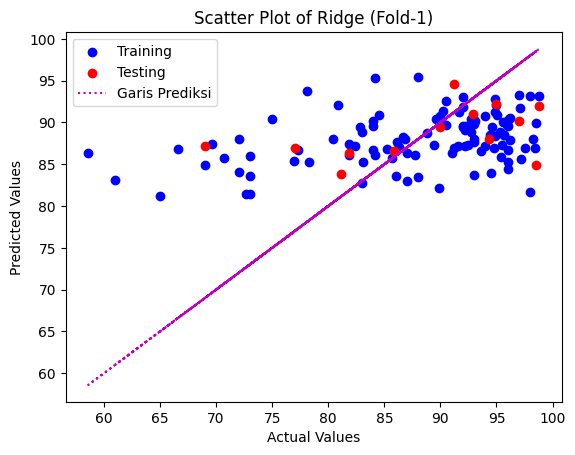

Ridge Fold-2:
MSE: 65.42195013697246
MAE: 6.336983852499848
RMSE: 8.08838365416555
R^2: 0.19016339455991926
------------------


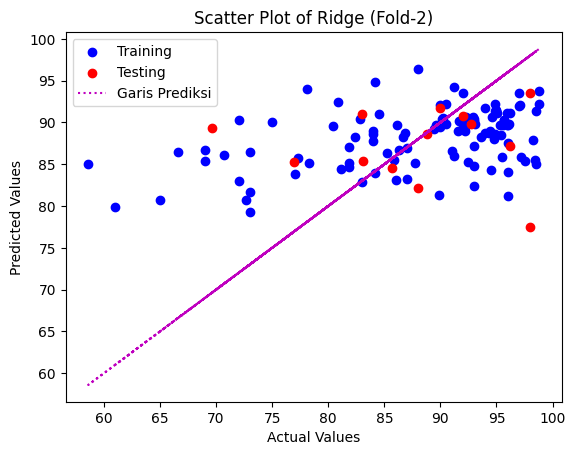

Ridge Fold-3:
MSE: 63.65916147481282
MAE: 6.360688050736668
RMSE: 7.978669154364832
R^2: 0.13050464986300325
------------------


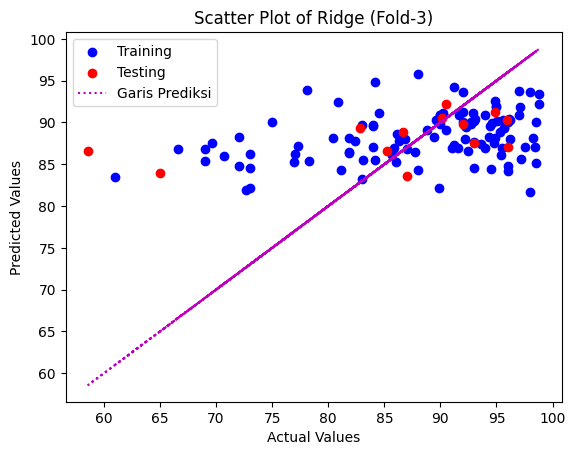

Ridge Fold-4:
MSE: 63.8044110164177
MAE: 6.13989809751344
RMSE: 7.98776633461556
R^2: 0.17326959917481088
------------------


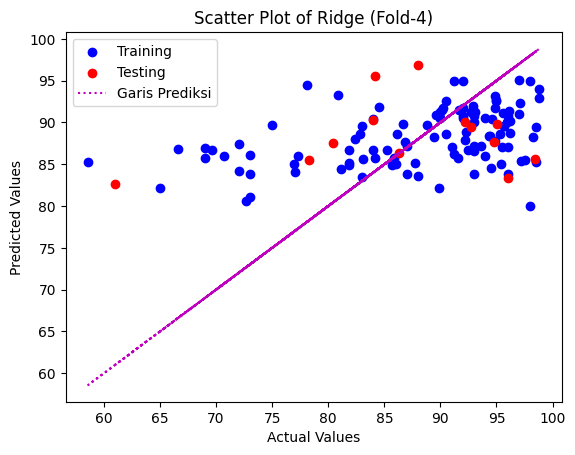

Ridge Fold-5:
MSE: 69.94644488987039
MAE: 6.591030778753956
RMSE: 8.363399122956551
R^2: 0.15275252954900498
------------------


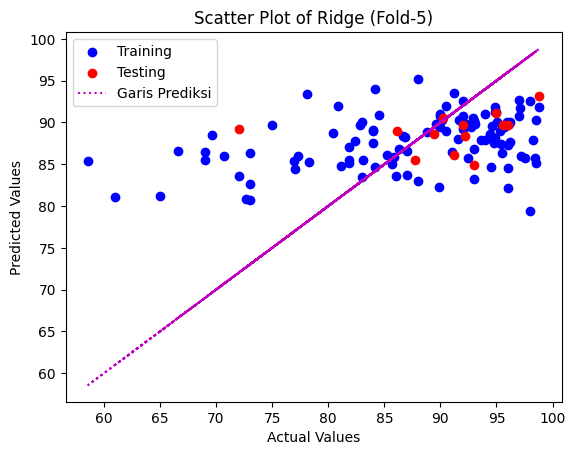

Ridge Fold-6:
MSE: 68.90917479662826
MAE: 6.474701889091104
RMSE: 8.30115502786379
R^2: 0.14014774929325102
------------------


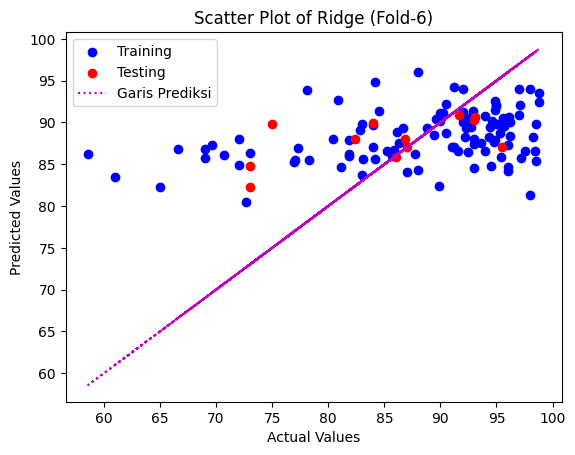

Ridge Fold-7:
MSE: 67.16791553051938
MAE: 6.431378890399782
RMSE: 8.195603426869761
R^2: 0.1358979136878805
------------------


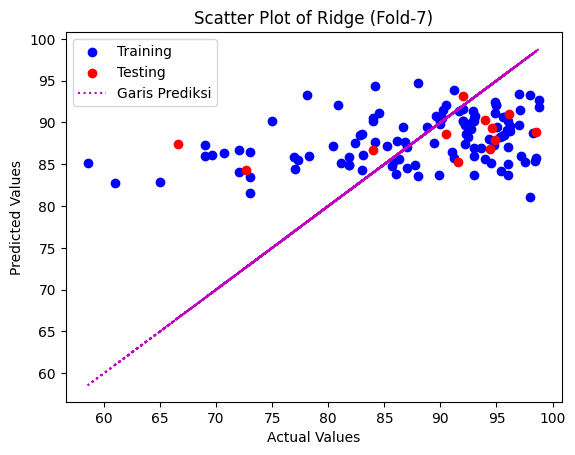

Ridge Fold-8:
MSE: 64.93561553695983
MAE: 6.2075762440647955
RMSE: 8.058263804130505
R^2: 0.18929765363162732
------------------


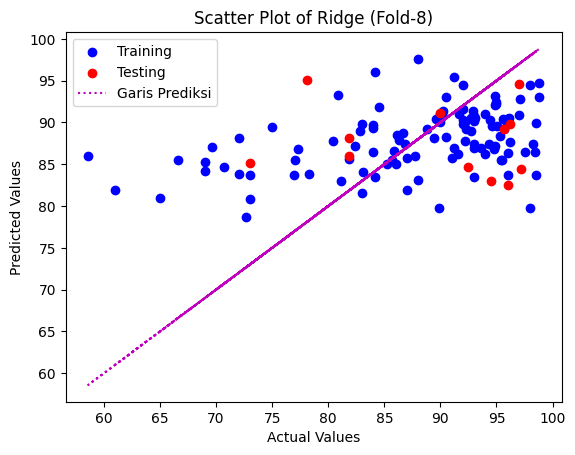

Ridge Fold-9:
MSE: 68.19260618826358
MAE: 6.391184661081941
RMSE: 8.257881458840613
R^2: 0.1545312262228672
------------------


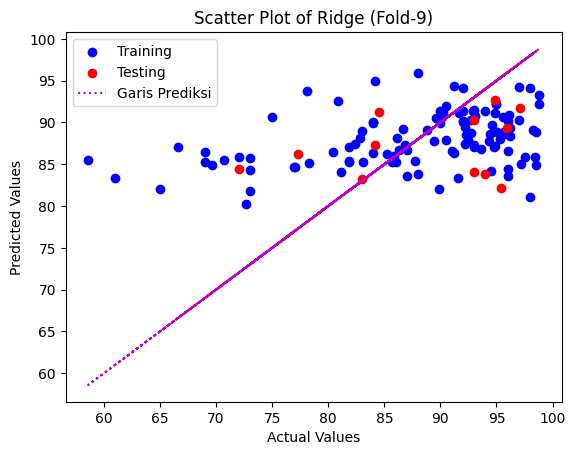

Ridge Fold-10:
MSE: 64.003933287864
MAE: 6.155897731425608
RMSE: 8.000245826714577
R^2: 0.17695263552116347
------------------


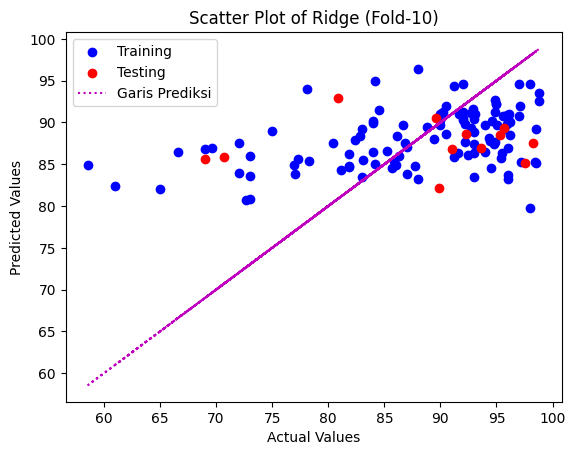

Rata-rata:
Mean MSE: 66.38925296361751
Mean MAE: 6.354824516786468
Mean RMSE: 8.146855888381044
Mean R^2: 0.1586392418155373


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_r = Ridge()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_r.fit(X_train, y_train)
    y_train_pred = model_r.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_r.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Ridge Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Ridge (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Lasso

Lasso Fold-1:
MSE: 75.8025417604078
MAE: 6.876703702241528
RMSE: 8.706465514800355
R^2: 0.04243201695380616
------------------


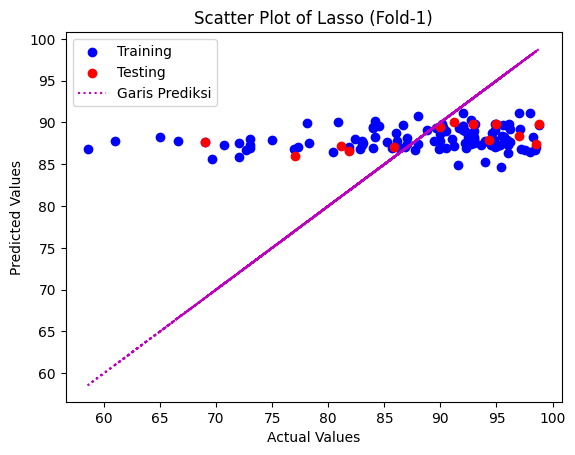

Lasso Fold-2:
MSE: 77.12171215686986
MAE: 6.96320832959456
RMSE: 8.781896842759533
R^2: 0.045335923981418946
------------------


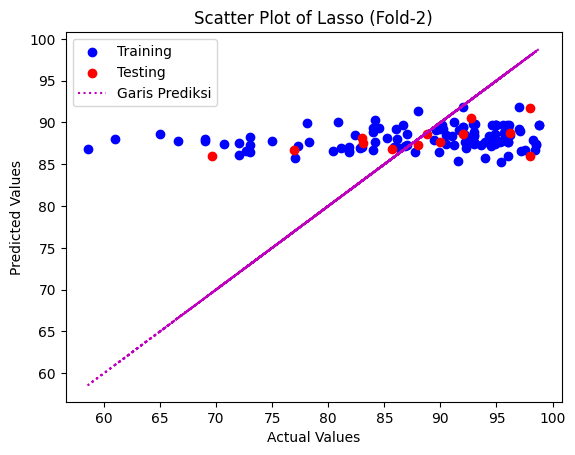

Lasso Fold-3:
MSE: 68.88291008399497
MAE: 6.695253250836232
RMSE: 8.299572885636644
R^2: 0.059155530258819145
------------------


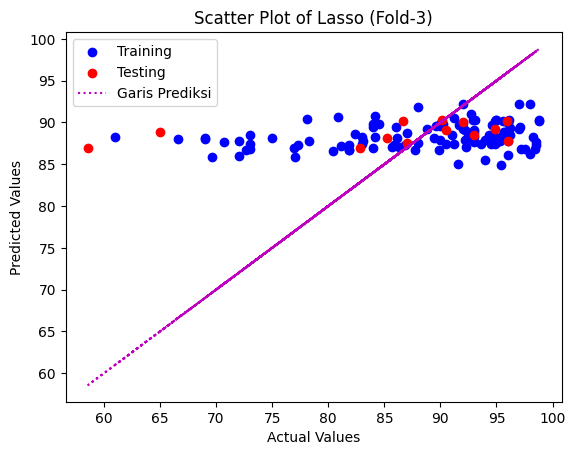

Lasso Fold-4:
MSE: 70.54622232940469
MAE: 6.560081519528787
RMSE: 8.399179860522377
R^2: 0.08591419097835651
------------------


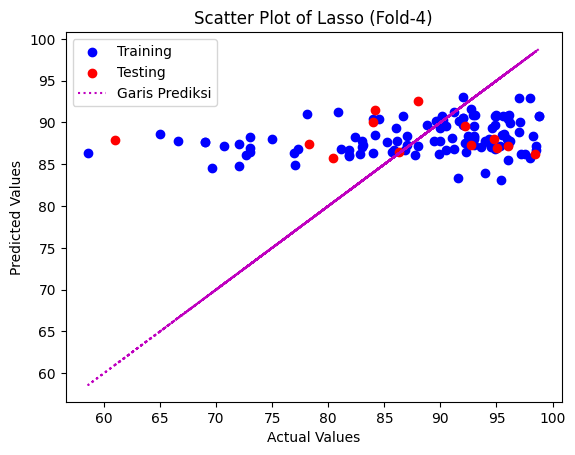

Lasso Fold-5:
MSE: 79.06409816930488
MAE: 7.1104839951532455
RMSE: 8.89179948994043
R^2: 0.042312196382496836
------------------


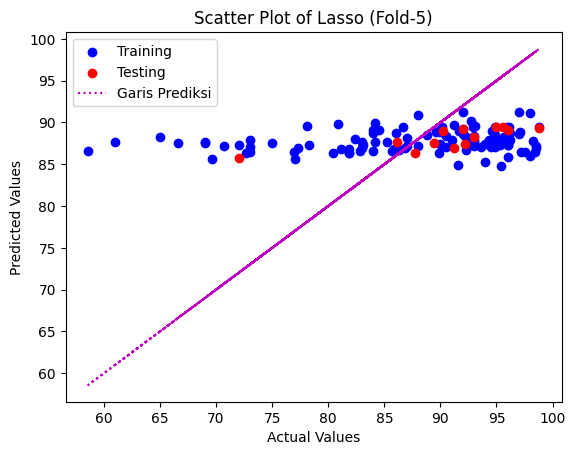

Lasso Fold-6:
MSE: 75.13271764415526
MAE: 6.736436622123532
RMSE: 8.667913107787552
R^2: 0.062490059433963685
------------------


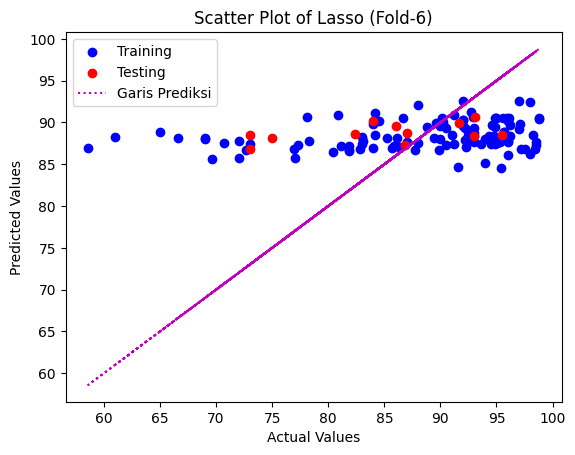

Lasso Fold-7:
MSE: 72.54863370623255
MAE: 6.674734149752949
RMSE: 8.517548573752459
R^2: 0.06667602754227453
------------------


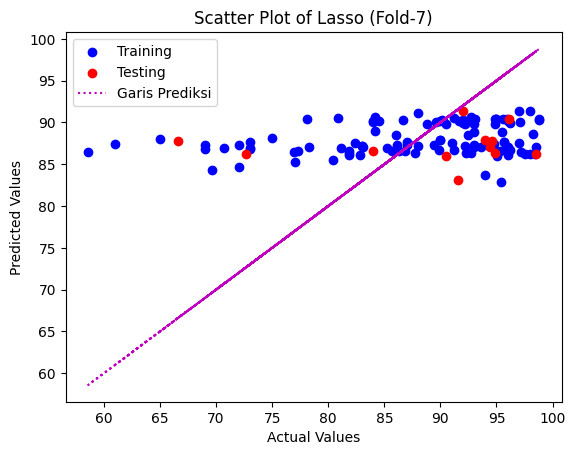

Lasso Fold-8:
MSE: 72.38418852344395
MAE: 6.597200367354017
RMSE: 8.507889780870691
R^2: 0.09630437794916702
------------------


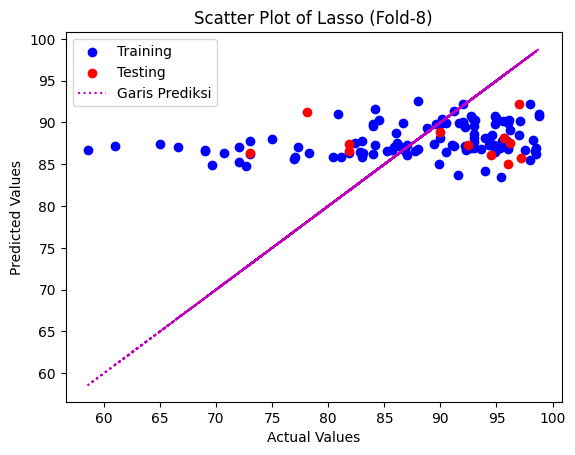

Lasso Fold-9:
MSE: 74.4360933715215
MAE: 6.671044890305732
RMSE: 8.62763544498268
R^2: 0.07712293010423588
------------------


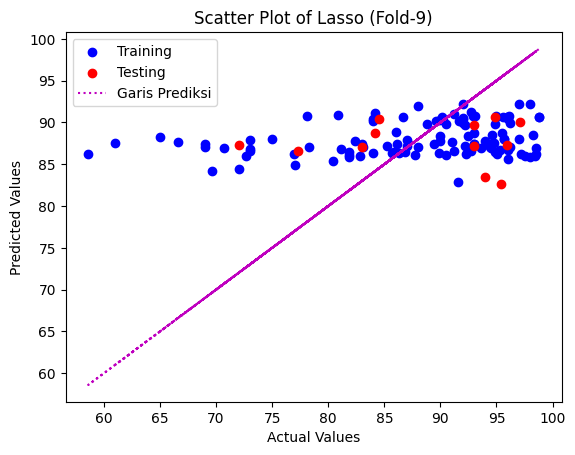

Lasso Fold-10:
MSE: 71.15901896783413
MAE: 6.553689201490835
RMSE: 8.435580535317895
R^2: 0.08494306503065263
------------------


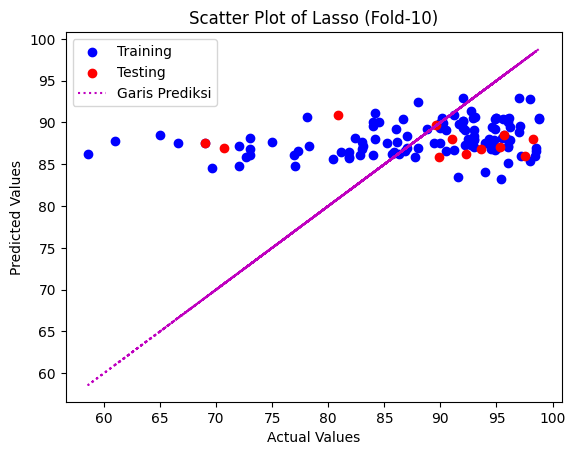

Rata-rata:
Mean MSE: 73.70781367131697
Mean MAE: 6.7438836028381415
Mean RMSE: 8.583548203637061
Mean R^2: 0.06626863186151913


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_l = Lasso()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_l.fit(X_train, y_train)
    y_train_pred = model_l.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_l.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Lasso Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Lasso (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Elastic Net

ELastic Net Fold-1:
MSE: 73.9862885975285
MAE: 6.777618044850001
RMSE: 8.601528271041635
R^2: 0.06537565231865605
------------------


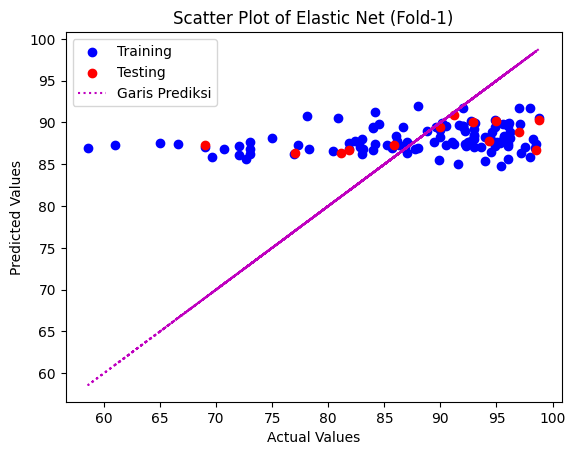

ELastic Net Fold-2:
MSE: 74.85863382493217
MAE: 6.855725532821253
RMSE: 8.652088408293814
R^2: 0.0733498194758867
------------------


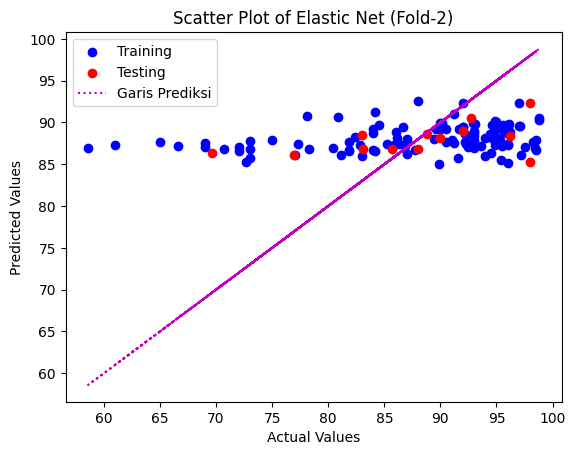

ELastic Net Fold-3:
MSE: 67.8633594069444
MAE: 6.6442788950219835
RMSE: 8.237922032099139
R^2: 0.07308117037701711
------------------


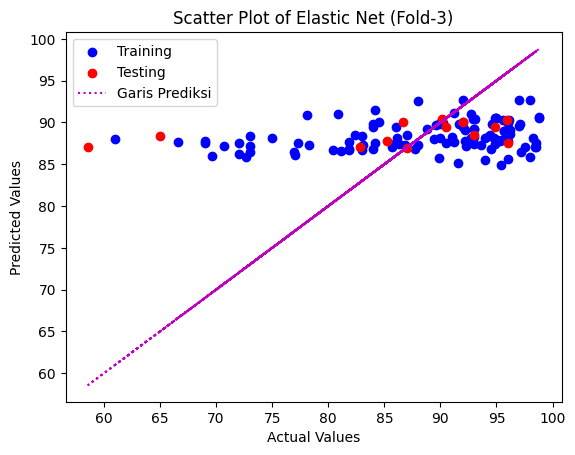

ELastic Net Fold-4:
MSE: 69.66589085351151
MAE: 6.511340284174501
RMSE: 8.346609542413704
R^2: 0.09732087559984648
------------------


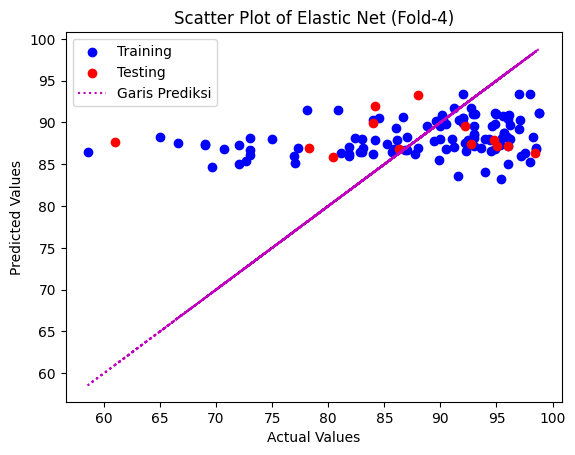

ELastic Net Fold-5:
MSE: 77.31513230874121
MAE: 7.02118970185188
RMSE: 8.792902382532244
R^2: 0.06349707437880958
------------------


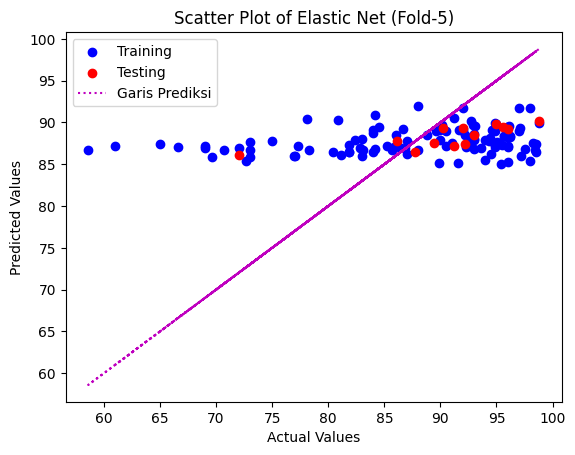

ELastic Net Fold-6:
MSE: 74.01000154994215
MAE: 6.682176302522604
RMSE: 8.602906575683717
R^2: 0.07649936898327903
------------------


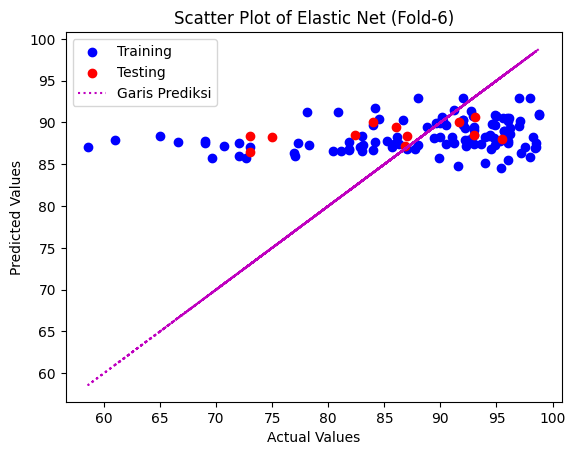

ELastic Net Fold-7:
MSE: 72.04589440216589
MAE: 6.638231304860756
RMSE: 8.487985297004577
R^2: 0.07314367028634217
------------------


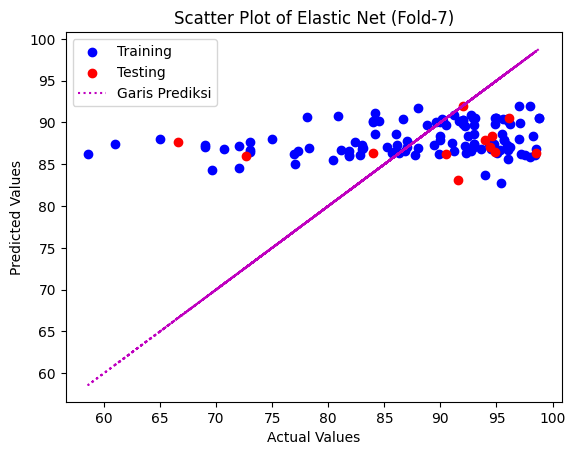

ELastic Net Fold-8:
MSE: 71.27456871059364
MAE: 6.547132069303023
RMSE: 8.44242670744577
R^2: 0.11015765982562153
------------------


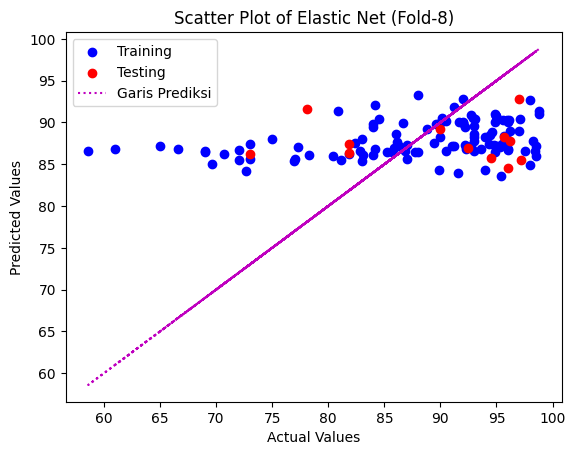

ELastic Net Fold-9:
MSE: 73.62890156239803
MAE: 6.643249776130323
RMSE: 8.580728498350128
R^2: 0.0871306935145163
------------------


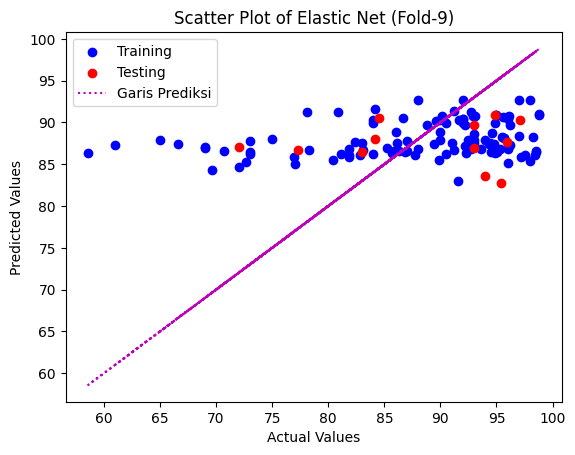

ELastic Net Fold-10:
MSE: 70.28404643065377
MAE: 6.506032351241675
RMSE: 8.38355810086945
R^2: 0.09619462104797949
------------------


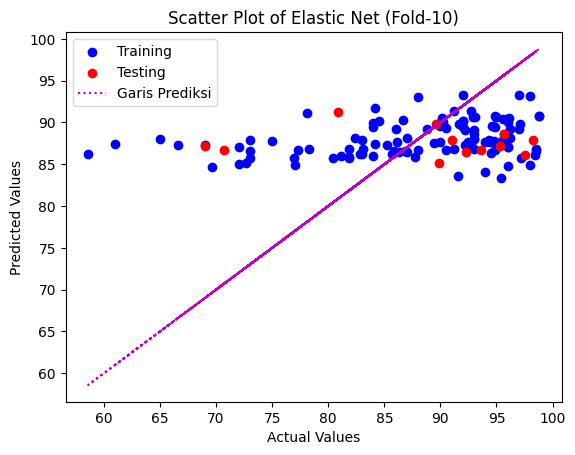

Rata-rata:
Mean MSE: 72.49327176474112
Mean MAE: 6.682697426277801
Mean RMSE: 8.512865581573418
Mean R^2: 0.08157506058079544


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_en = ElasticNet()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_en.fit(X_train, y_train)
    y_train_pred = model_en.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_en.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"ELastic Net Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Elastic Net (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


# Non Linear

## KNeighbour Regressor

KNeighborsRegressor Fold-1:
MSE: 45.697293214285715
MAE: 5.223571428571428
RMSE: 6.75997730871086
R^2: 0.4227335406221254
------------------


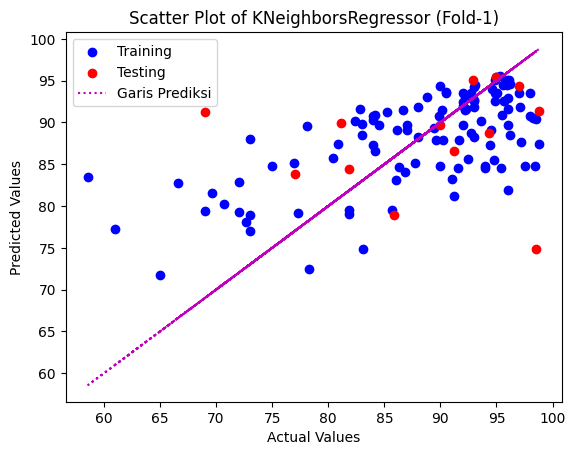

KNeighborsRegressor Fold-2:
MSE: 52.948926357142845
MAE: 5.369357142857142
RMSE: 7.276601291615671
R^2: 0.3445628157982369
------------------


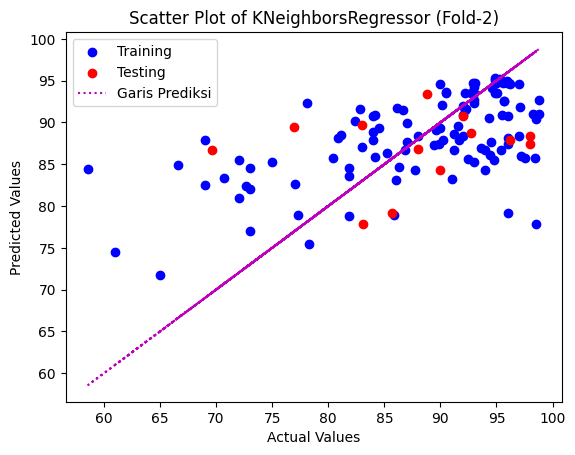

KNeighborsRegressor Fold-3:
MSE: 44.625582464285706
MAE: 5.204732142857144
RMSE: 6.680238204157521
R^2: 0.3904767899714843
------------------


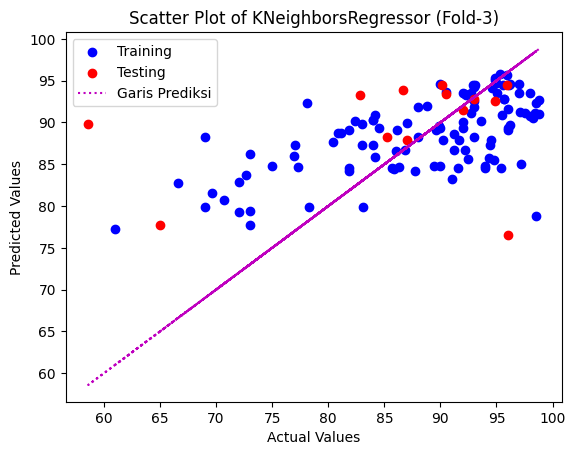

KNeighborsRegressor Fold-4:
MSE: 50.59912064285715
MAE: 5.279071428571428
RMSE: 7.113305887058221
R^2: 0.34437399195319707
------------------


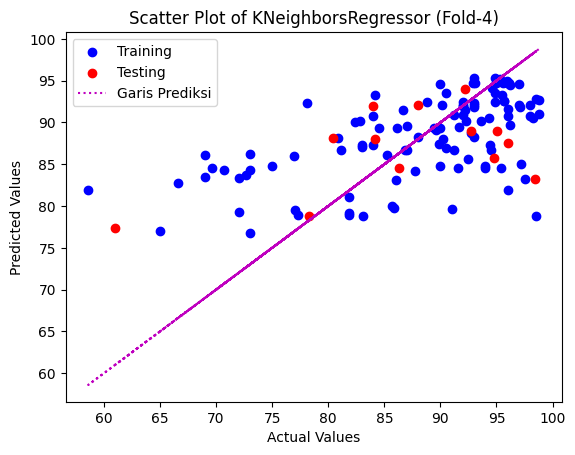

KNeighborsRegressor Fold-5:
MSE: 54.88018321428571
MAE: 5.649285714285713
RMSE: 7.408116036772488
R^2: 0.3352471811912716
------------------


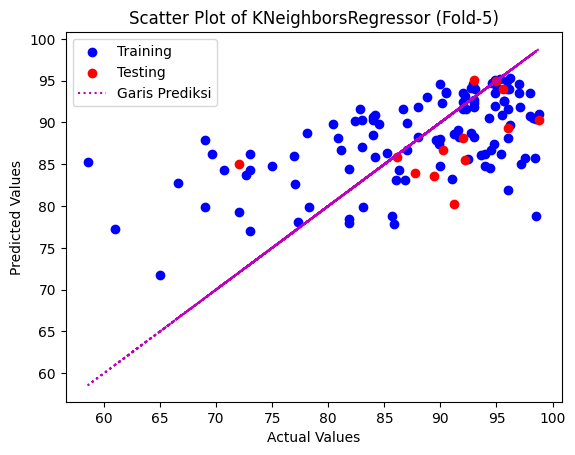

KNeighborsRegressor Fold-6:
MSE: 52.63225869026548
MAE: 5.369840707964601
RMSE: 7.254809348995016
R^2: 0.34325195116370777
------------------


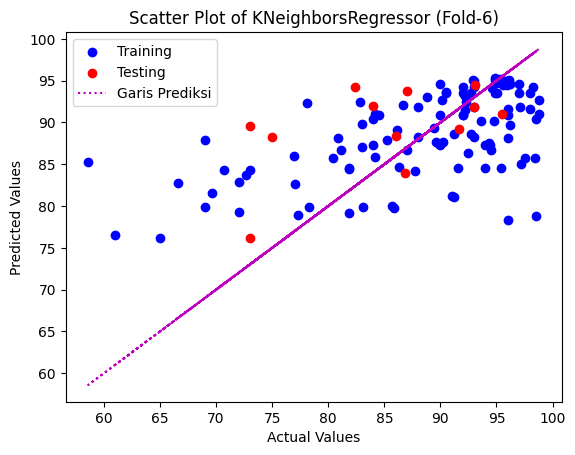

KNeighborsRegressor Fold-7:
MSE: 50.602052389380525
MAE: 5.281982300884955
RMSE: 7.113511958897695
R^2: 0.3490145005099763
------------------


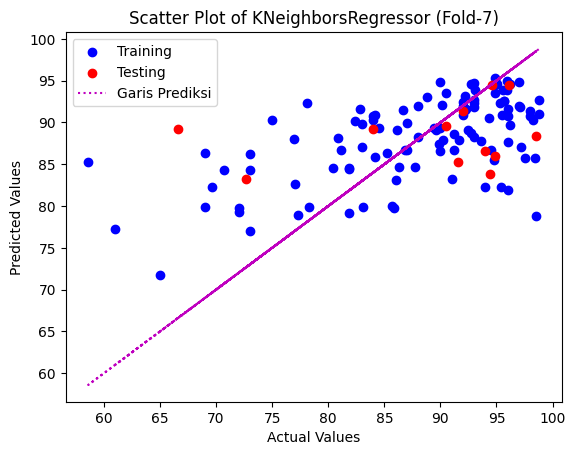

KNeighborsRegressor Fold-8:
MSE: 50.986990088495574
MAE: 5.231823008849557
RMSE: 7.140517494446434
R^2: 0.36344220106026015
------------------


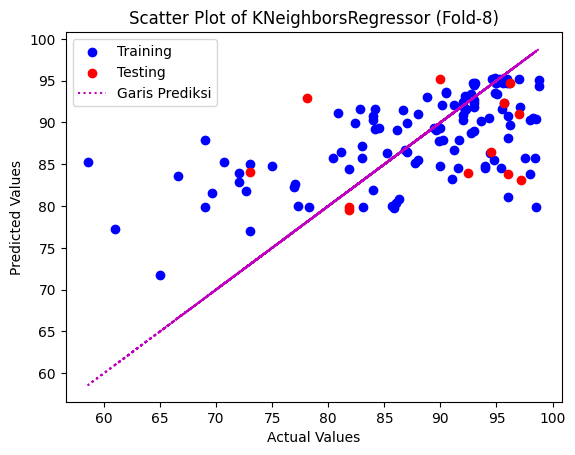

KNeighborsRegressor Fold-9:
MSE: 53.560129097345126
MAE: 5.407699115044246
RMSE: 7.318478605375923
R^2: 0.3359482911349574
------------------


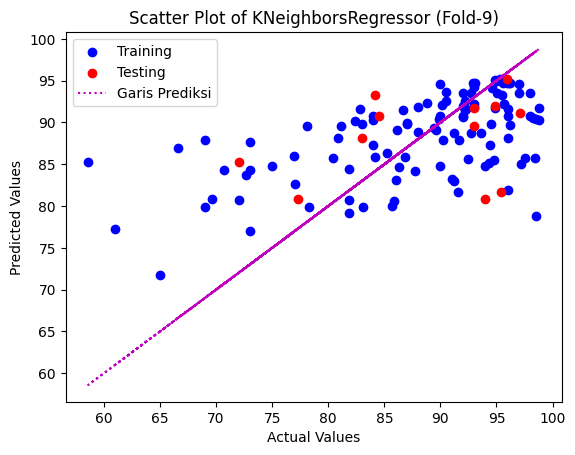

KNeighborsRegressor Fold-10:
MSE: 53.46593015929205
MAE: 5.520442477876106
RMSE: 7.312040081898625
R^2: 0.3124642401413352
------------------


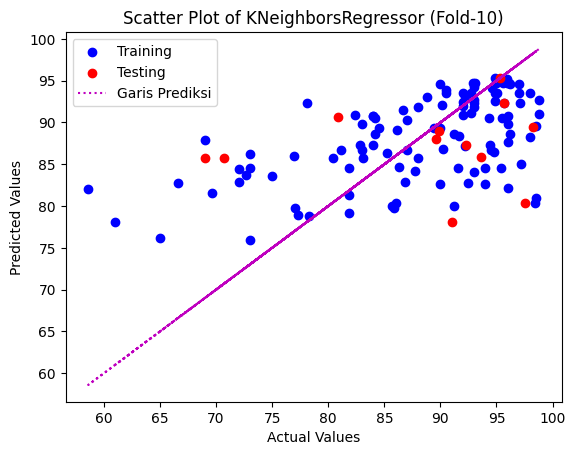

Rata-rata:
Mean MSE: 50.99984663176359
Mean MAE: 5.353780546776231
Mean RMSE: 7.137759621792846
Mean R^2: 0.3541515503546552


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model KNN
model_knn = KNeighborsRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_knn.fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_knn.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"KNeighborsRegressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of KNeighborsRegressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Desicion Tree Regressor

Decision Tree Regressor Fold-1:
MSE: 0.07142857142857142
MAE: 0.03571428571428571
RMSE: 0.2672612419124244
R^2: 0.999097685757149
------------------


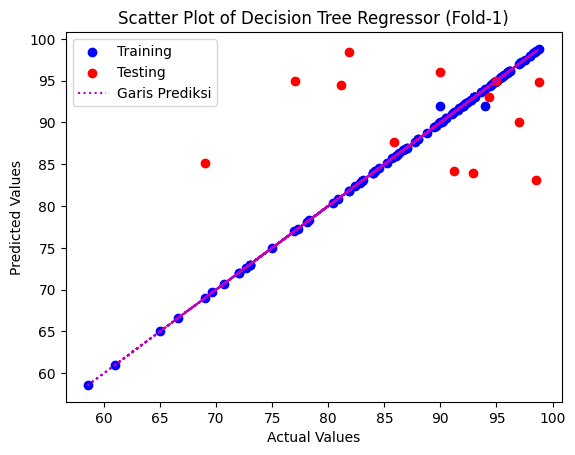

Decision Tree Regressor Fold-2:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


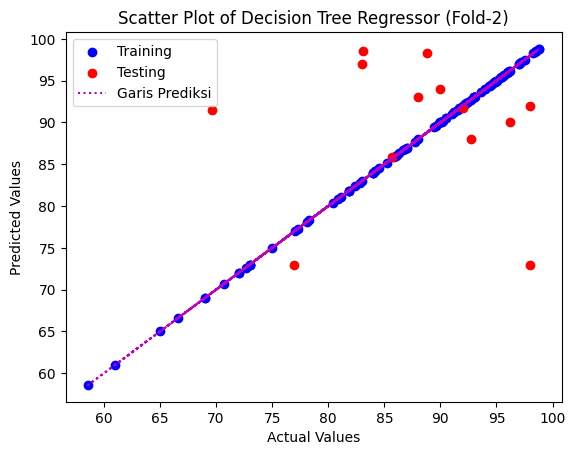

Decision Tree Regressor Fold-3:
MSE: 0.07142857142857142
MAE: 0.03571428571428571
RMSE: 0.2672612419124244
R^2: 0.9990243853471328
------------------


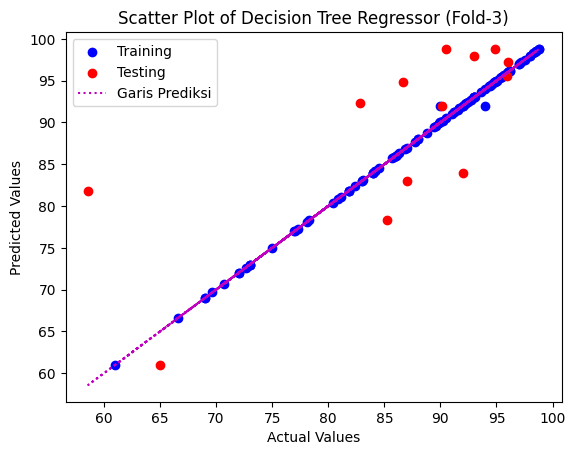

Decision Tree Regressor Fold-4:
MSE: 0.07142857142857142
MAE: 0.03571428571428571
RMSE: 0.2672612419124244
R^2: 0.9990744813634856
------------------


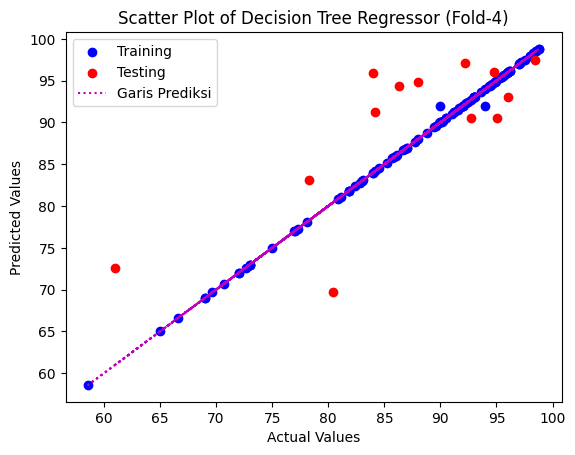

Decision Tree Regressor Fold-5:
MSE: 0.07142857142857142
MAE: 0.03571428571428571
RMSE: 0.2672612419124244
R^2: 0.9991347998235497
------------------


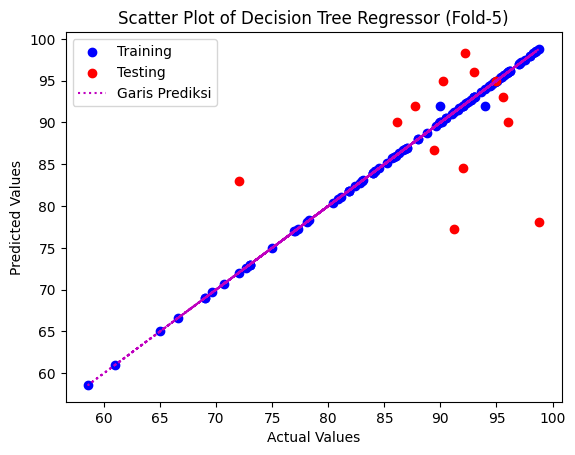

Decision Tree Regressor Fold-6:
MSE: 0.07079646017699115
MAE: 0.035398230088495575
RMSE: 0.2660760420950957
R^2: 0.9991165981046077
------------------


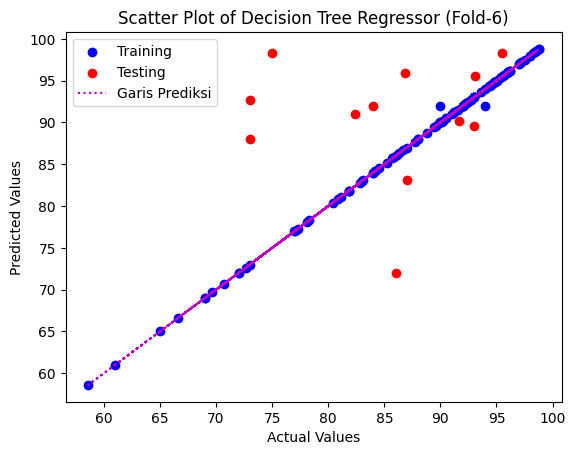

Decision Tree Regressor Fold-7:
MSE: 0.0
MAE: 0.0
RMSE: 0.0
R^2: 1.0
------------------


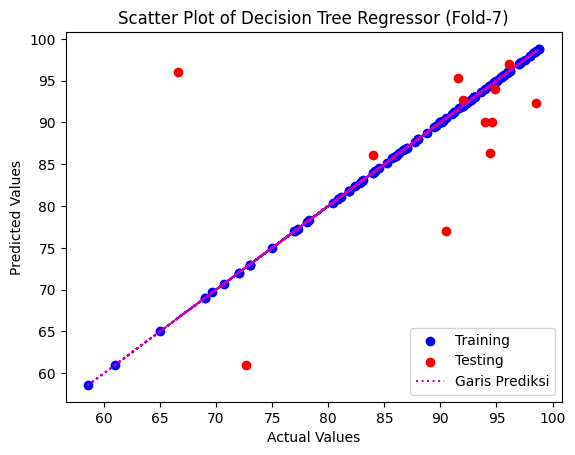

Decision Tree Regressor Fold-8:
MSE: 0.07079646017699115
MAE: 0.035398230088495575
RMSE: 0.2660760420950957
R^2: 0.9991161267063466
------------------


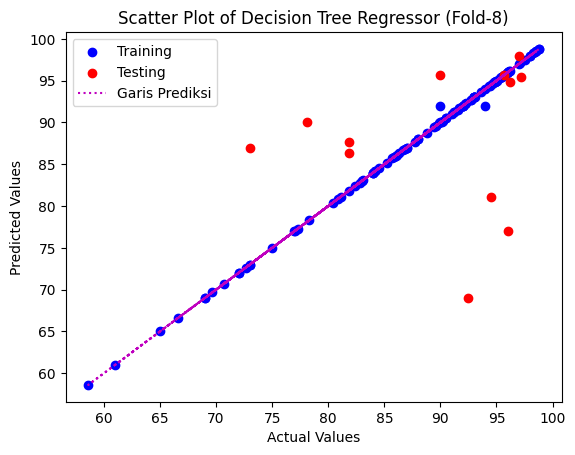

Decision Tree Regressor Fold-9:
MSE: 0.07079646017699115
MAE: 0.035398230088495575
RMSE: 0.2660760420950957
R^2: 0.9991222480013691
------------------


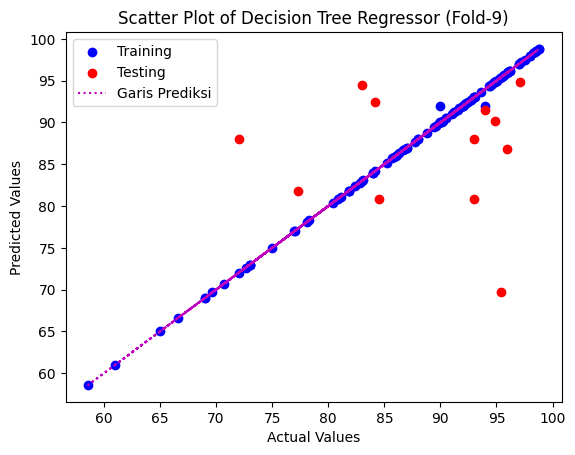

Decision Tree Regressor Fold-10:
MSE: 0.07079646017699115
MAE: 0.035398230088495575
RMSE: 0.2660760420950957
R^2: 0.999089605326269
------------------


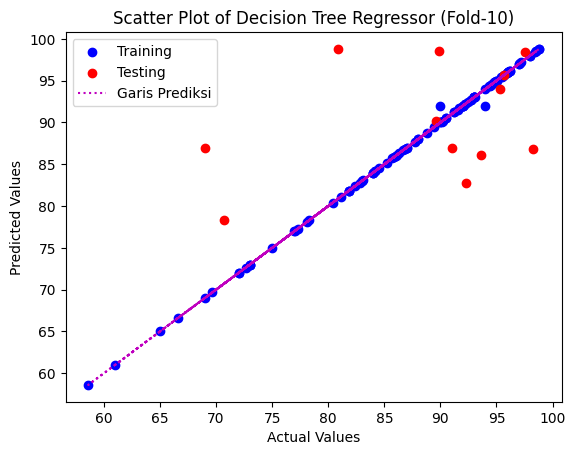

Rata-rata:
Mean MSE: 0.05689001264222503
Mean MAE: 0.028445006321112513
Mean RMSE: 0.21333491360300805
Mean R^2: 0.9992775930429909


In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]
# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model nu
model_dt = DecisionTreeRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_dt.fit(X_train, y_train)
    y_train_pred = model_dt.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_dt.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Decision Tree Regressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Decision Tree Regressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Nu SVR

NuSVR Fold-1:
MSE: 77.80627522534931
MAE: 6.702463660620203
RMSE: 8.820786542329959
R^2: 0.01712005553368967
------------------


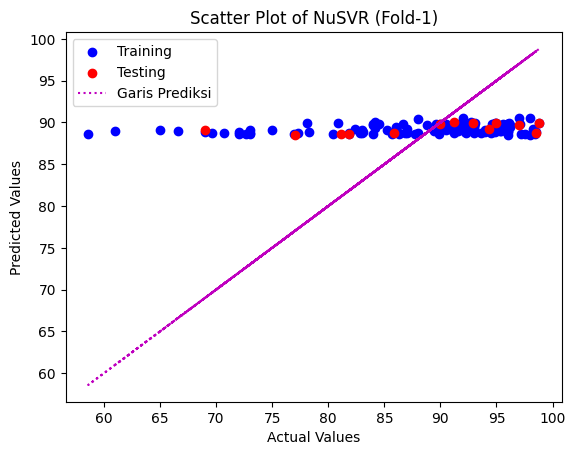

NuSVR Fold-2:
MSE: 78.59658323593268
MAE: 6.796851676124528
RMSE: 8.86547140517258
R^2: 0.027078984443094534
------------------


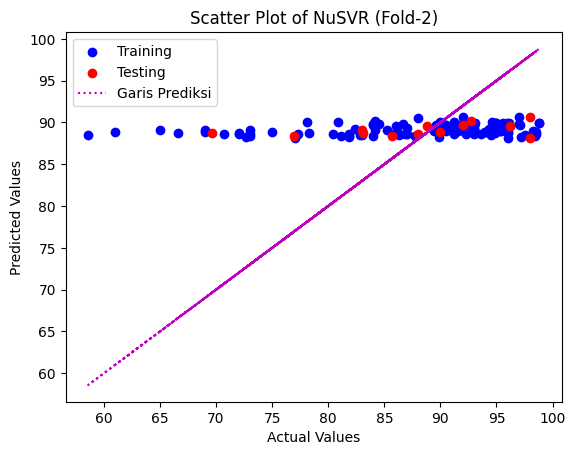

NuSVR Fold-3:
MSE: 70.4171782859316
MAE: 6.632274372827653
RMSE: 8.391494401233405
R^2: 0.03819956670949143
------------------


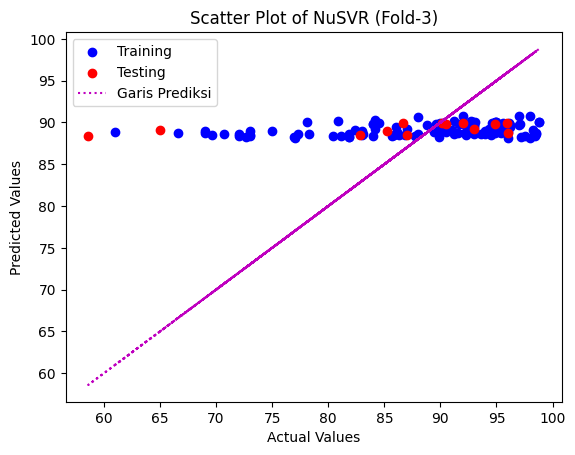

NuSVR Fold-4:
MSE: 73.4357250191733
MAE: 6.539329491265235
RMSE: 8.56946468685024
R^2: 0.048474150723409326
------------------


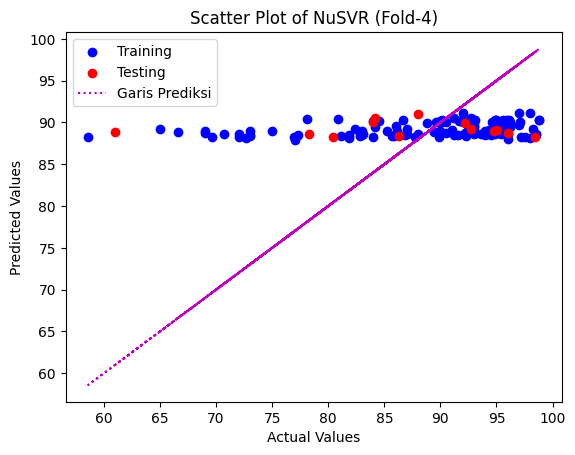

NuSVR Fold-5:
MSE: 81.05431378019499
MAE: 6.966222812114138
RMSE: 9.003016926574945
R^2: 0.018205107814469934
------------------


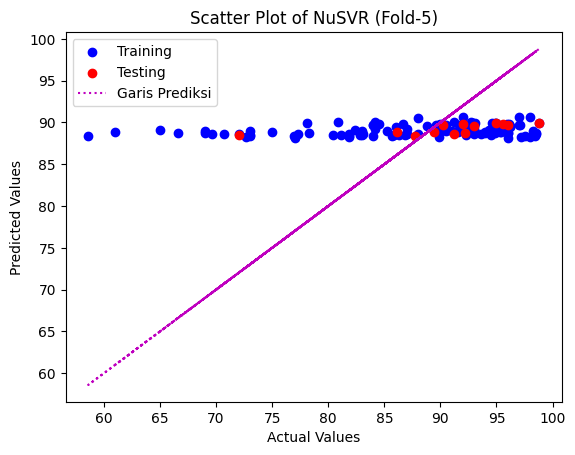

NuSVR Fold-6:
MSE: 77.08565114097877
MAE: 6.639386330095583
RMSE: 8.77984345765793
R^2: 0.03812125415251577
------------------


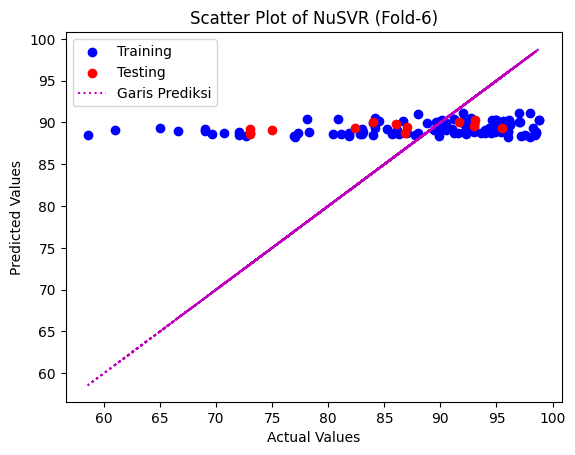

NuSVR Fold-7:
MSE: 75.08707215621133
MAE: 6.663215088756557
RMSE: 8.665279692901512
R^2: 0.03401951373986367
------------------


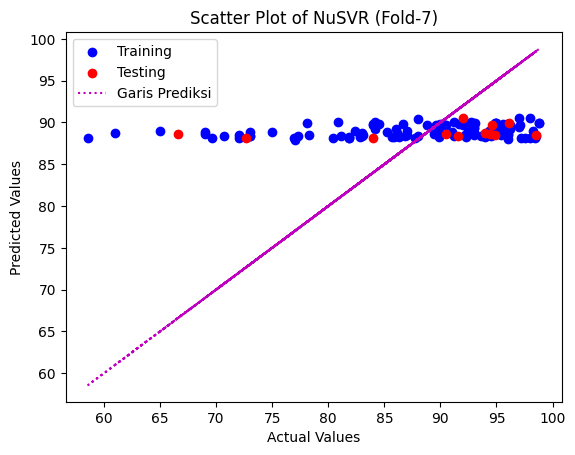

NuSVR Fold-8:
MSE: 76.77030685654259
MAE: 6.624466443575843
RMSE: 8.761866630835154
R^2: 0.041544961337977804
------------------


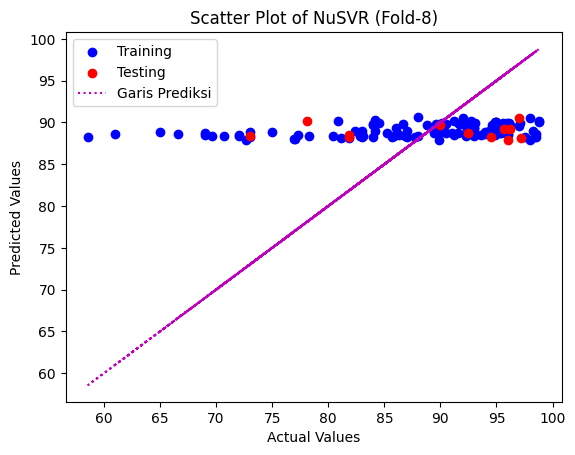

NuSVR Fold-9:
MSE: 77.85090760410296
MAE: 6.700441224572413
RMSE: 8.823316134203905
R^2: 0.03478521985561023
------------------


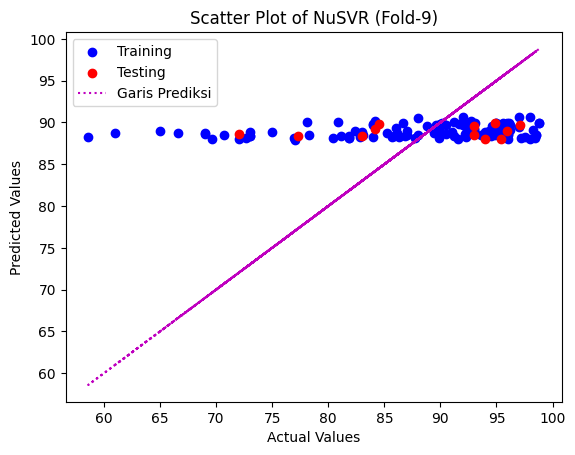

NuSVR Fold-10:
MSE: 74.3779601697503
MAE: 6.571583440052723
RMSE: 8.624265775690722
R^2: 0.043549654711106056
------------------


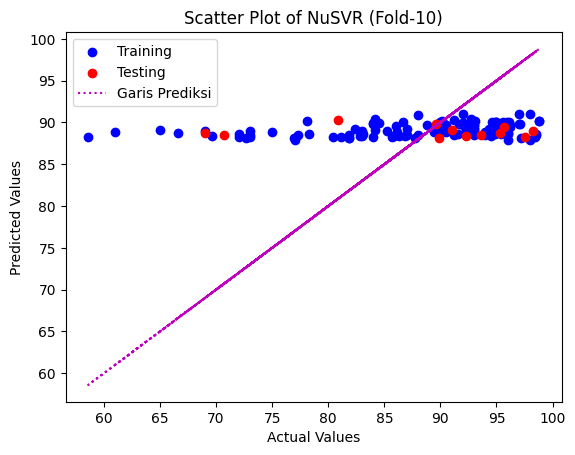

Rata-rata:
Mean MSE: 76.24819734741678
Mean MAE: 6.683623454000488
Mean RMSE: 8.730480565345035
Mean R^2: 0.03410984690212284


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model nu
model_nu = NuSVR()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_nu.fit(X_train, y_train)
    y_train_pred = model_nu.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_nu.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"NuSVR Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of NuSVR (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


# Ensemble

## Random Forest Regressor

Random Forest Regressor Fold-1:
MSE: 10.068840782877045
MAE: 2.412946428571437
RMSE: 3.1731436751078643
R^2: 0.8728063817365461
------------------


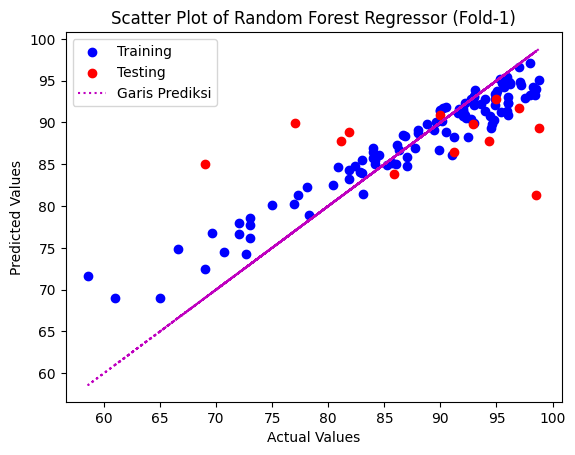

Random Forest Regressor Fold-2:
MSE: 10.663267981250103
MAE: 2.4804553571428682
RMSE: 3.265465966941028
R^2: 0.8680029450856551
------------------


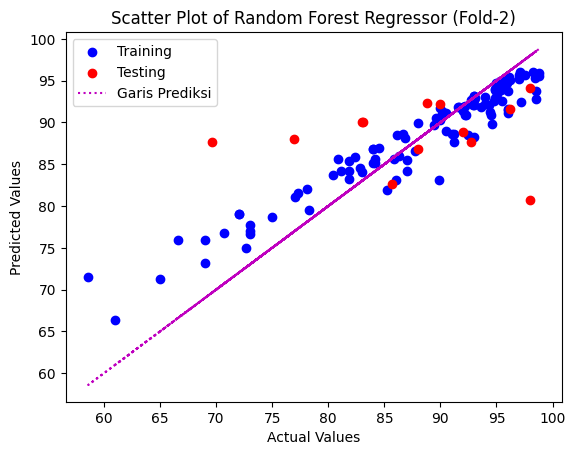

Random Forest Regressor Fold-3:
MSE: 9.868099942153265
MAE: 2.4774264880952472
RMSE: 3.1413532023879878
R^2: 0.8652155194066722
------------------


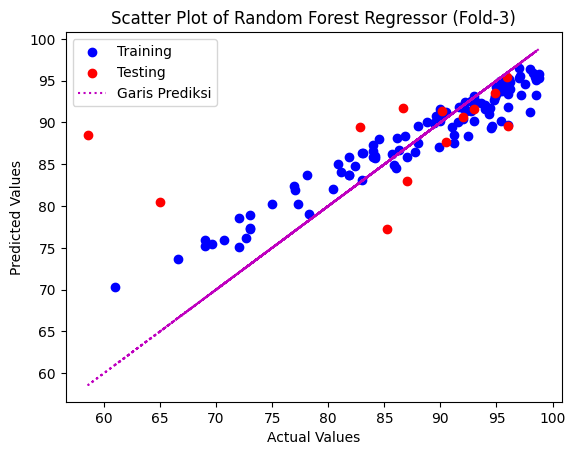

Random Forest Regressor Fold-4:
MSE: 10.732492892787759
MAE: 2.6011437500000123
RMSE: 3.2760483654530743
R^2: 0.8609362893605458
------------------


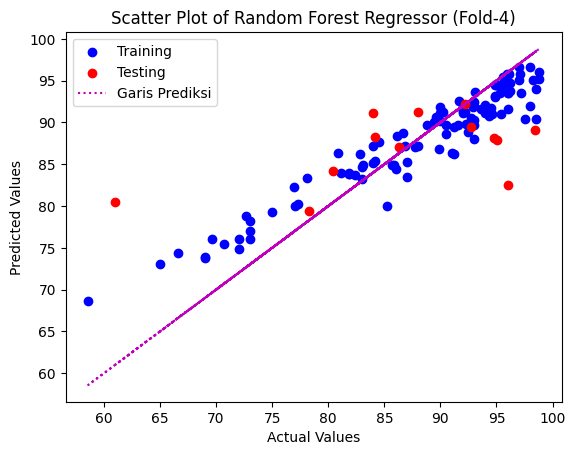

Random Forest Regressor Fold-5:
MSE: 11.40024568860127
MAE: 2.588798511904778
RMSE: 3.3764249863726086
R^2: 0.8619110758610395
------------------


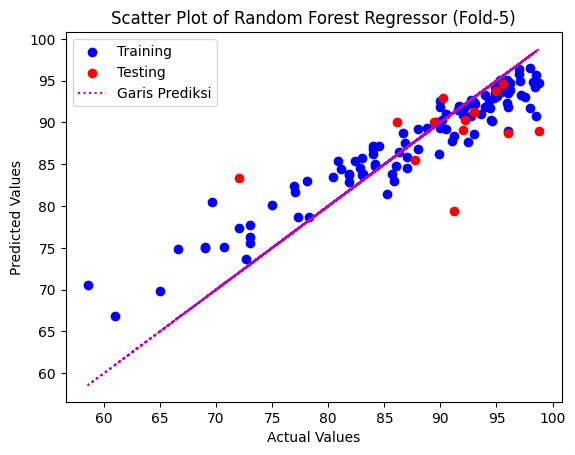

Random Forest Regressor Fold-6:
MSE: 11.042535314965663
MAE: 2.50304778761063
RMSE: 3.3230310433346335
R^2: 0.8622106726411333
------------------


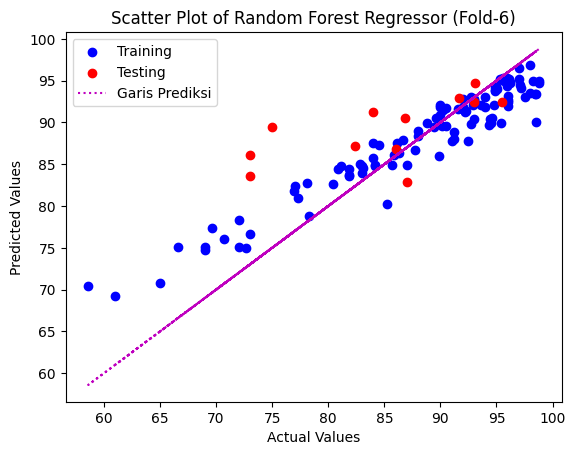

Random Forest Regressor Fold-7:
MSE: 10.270987826017778
MAE: 2.4800442477876223
RMSE: 3.2048381903019343
R^2: 0.867865751991132
------------------


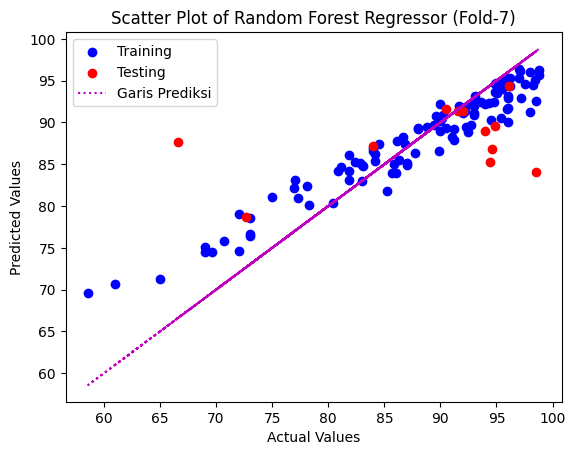

Random Forest Regressor Fold-8:
MSE: 9.760812173333408
MAE: 2.371061356932166
RMSE: 3.12422985283308
R^2: 0.8781390879881872
------------------


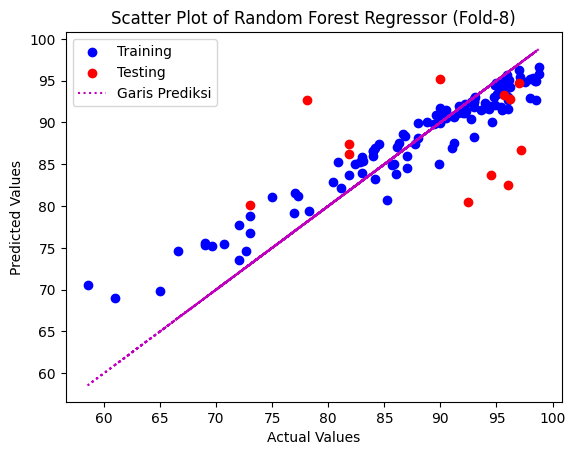

Random Forest Regressor Fold-9:
MSE: 10.409474205307797
MAE: 2.5221811209439626
RMSE: 3.226371678109606
R^2: 0.8709407678637604
------------------


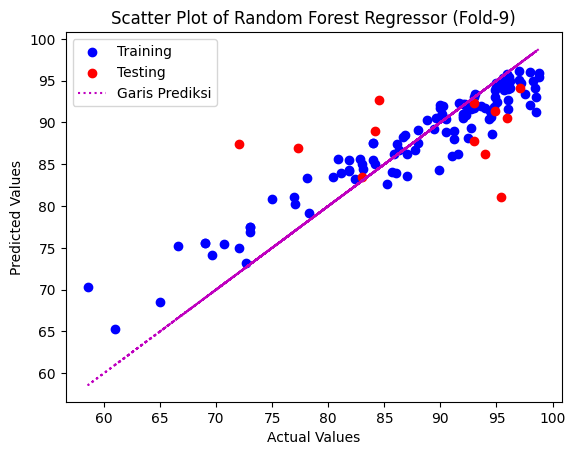

Random Forest Regressor Fold-10:
MSE: 10.836176936568435
MAE: 2.475783775811219
RMSE: 3.2918348890198663
R^2: 0.8606540815459524
------------------


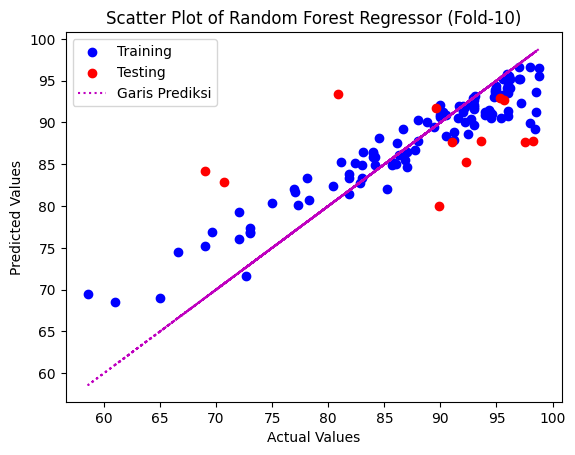

Rata-rata:
Mean MSE: 10.505293374386252
Mean MAE: 2.491288882479995
Mean RMSE: 3.2402741849861685
Mean R^2: 0.8668682573480624


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model R
model_rf = RandomForestRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_rf.fit(X_train, y_train)
    y_train_pred = model_rf.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_rf.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Random Forest Regressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Random Forest Regressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Gradient Boosting Regressor

Gradient Boosting Regressor Fold-1:
MSE: 18.357232584672687
MAE: 3.0536074404761964
RMSE: 4.284534115242017
R^2: 0.7681041061132838
------------------


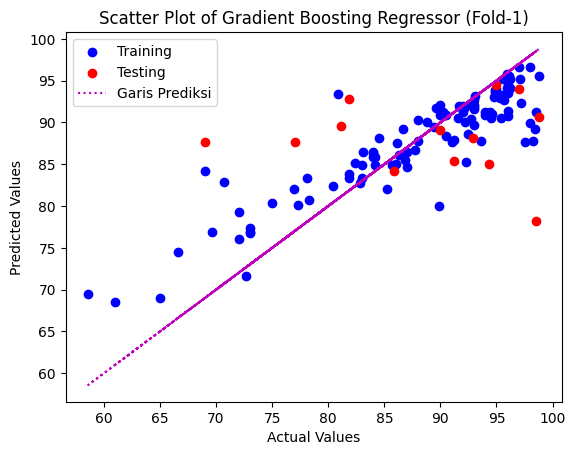

Gradient Boosting Regressor Fold-2:
MSE: 17.927543093710405
MAE: 3.021711309523817
RMSE: 4.23409294816616
R^2: 0.7780808946768724
------------------


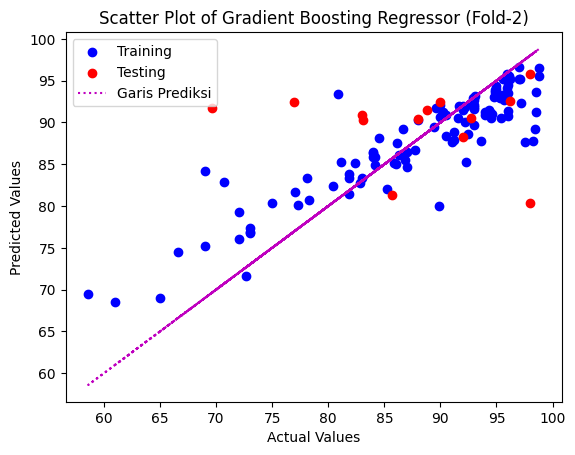

Gradient Boosting Regressor Fold-3:
MSE: 17.99423060430562
MAE: 3.069453571428577
RMSE: 4.241960702824299
R^2: 0.754223909375134
------------------


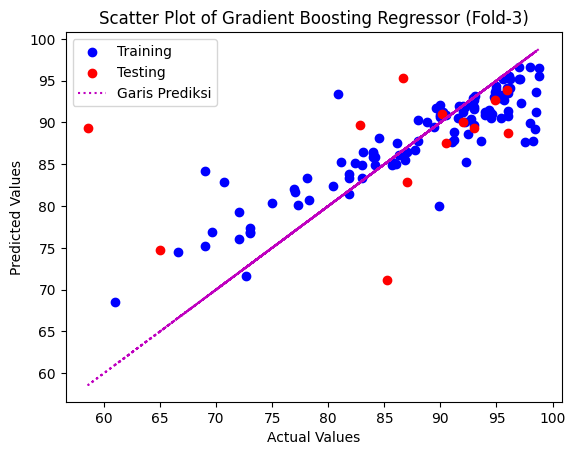

Gradient Boosting Regressor Fold-4:
MSE: 17.77974782074412
MAE: 3.020365178571438
RMSE: 4.216603825443424
R^2: 0.7696231685512729
------------------


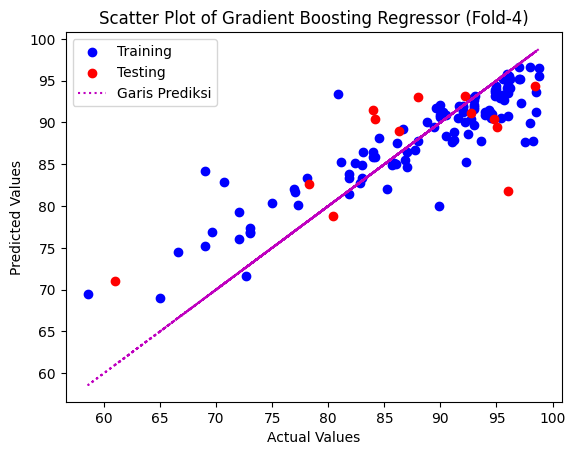

Gradient Boosting Regressor Fold-5:
MSE: 18.987808925248096
MAE: 3.1473229166666763
RMSE: 4.357500306970511
R^2: 0.7700044211445971
------------------


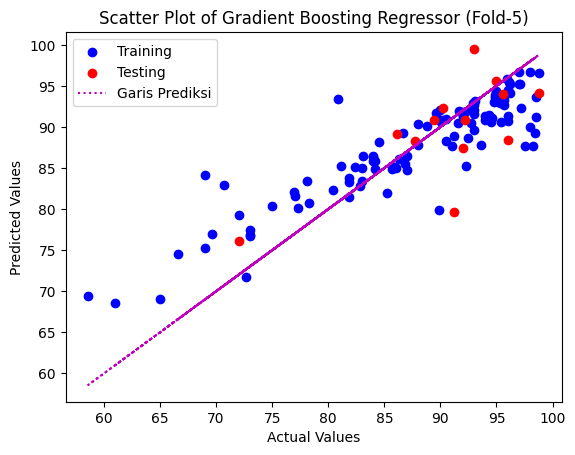

Gradient Boosting Regressor Fold-6:
MSE: 18.593250024198706
MAE: 3.08644100294986
RMSE: 4.311989102977732
R^2: 0.7679924635805849
------------------


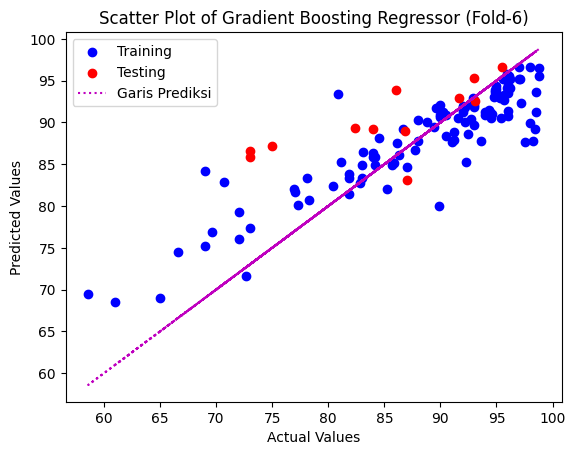

Gradient Boosting Regressor Fold-7:
MSE: 17.910234931563508
MAE: 3.0250489675516303
RMSE: 4.232048550237049
R^2: 0.769588333232223
------------------


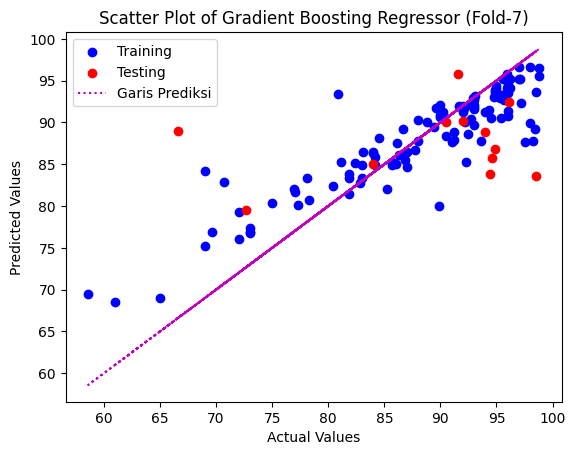

Gradient Boosting Regressor Fold-8:
MSE: 18.004630735988265
MAE: 2.9807144542772916
RMSE: 4.243186389494134
R^2: 0.7752174016914666
------------------


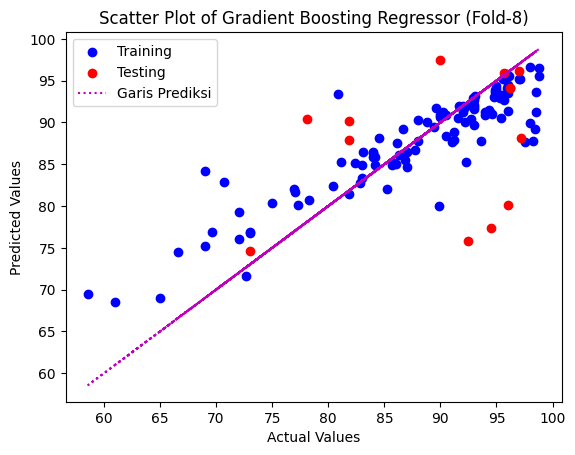

Gradient Boosting Regressor Fold-9:
MSE: 18.171451922369787
MAE: 3.0234333333333394
RMSE: 4.262798602135666
R^2: 0.7747058510692285
------------------


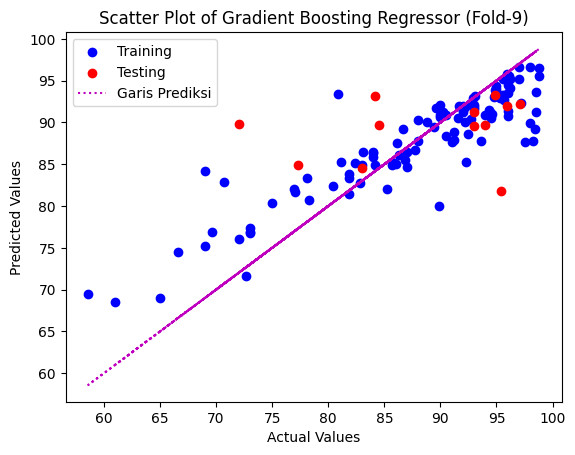

Gradient Boosting Regressor Fold-10:
MSE: 10.836176936568435
MAE: 2.475783775811219
RMSE: 3.2918348890198663
R^2: 0.8606540815459524
------------------


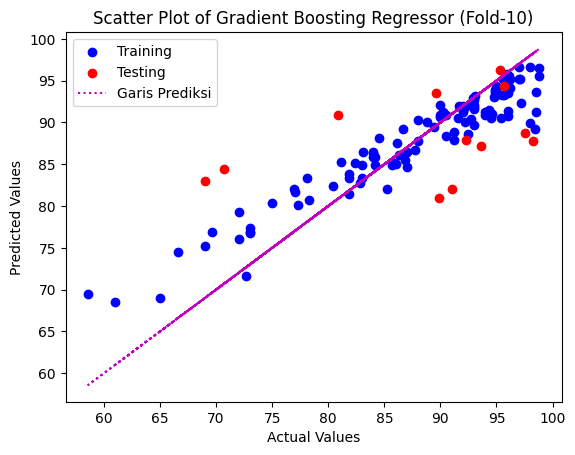

Rata-rata:
Mean MSE: 17.456230757936964
Mean MAE: 2.9903881950590048
Mean RMSE: 4.167654943251086
Mean R^2: 0.7788194630980616


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model gbr
model_gbr = GradientBoostingRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_gbr.fit(X_train, y_train)
    y_train_pred = model_rf.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_gbr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"Gradient Boosting Regressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Gradient Boosting Regressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## AdaBoost Regressor

AdaBoostRegressor Fold-1:
MSE: 23.78394219611464
MAE: 4.31227262106989
RMSE: 4.876878324924115
R^2: 0.6995517428741926
------------------


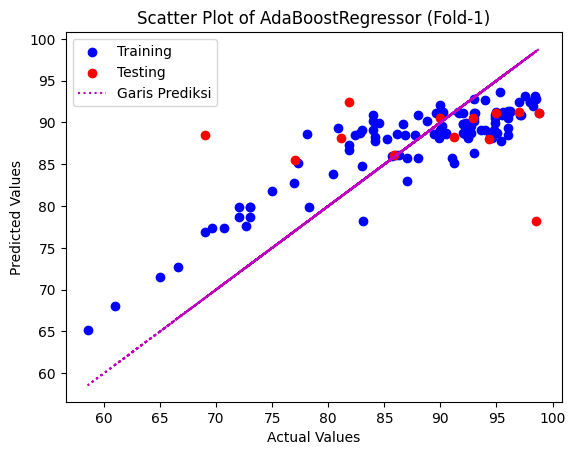

AdaBoostRegressor Fold-2:
MSE: 24.101528015670826
MAE: 4.392250778451838
RMSE: 4.909330709543902
R^2: 0.7016551846396379
------------------


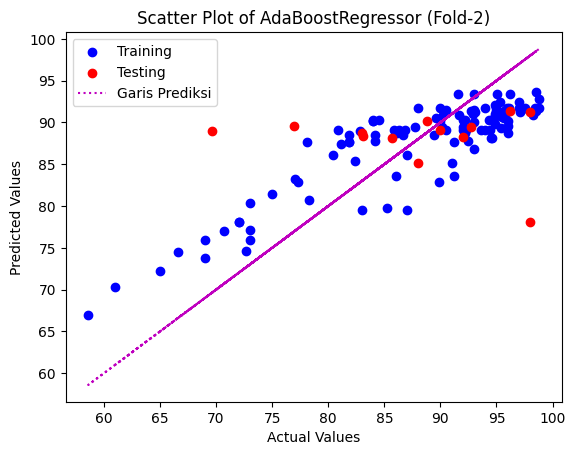

AdaBoostRegressor Fold-3:
MSE: 21.86176464844883
MAE: 4.053666559185946
RMSE: 4.675656600783341
R^2: 0.701398789000126
------------------


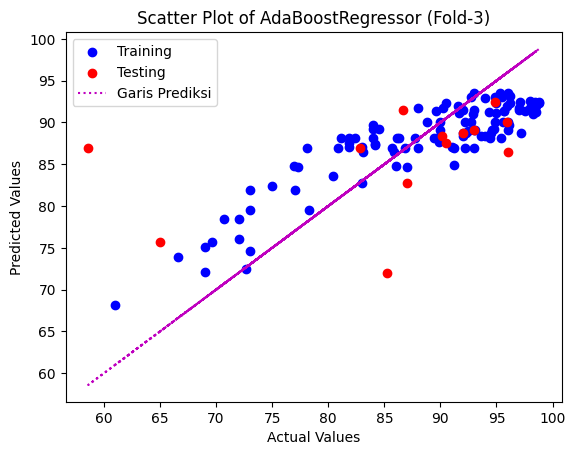

AdaBoostRegressor Fold-4:
MSE: 26.932997389090133
MAE: 4.622944066021629
RMSE: 5.18970108860714
R^2: 0.6510221257088817
------------------


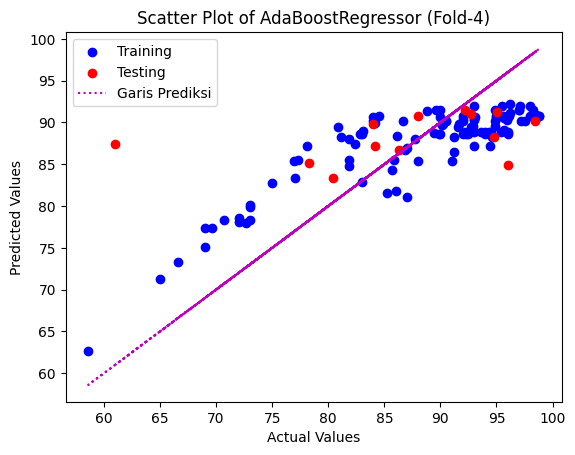

AdaBoostRegressor Fold-5:
MSE: 28.314408670246422
MAE: 4.6873581245246445
RMSE: 5.321128514727532
R^2: 0.6570331607138461
------------------


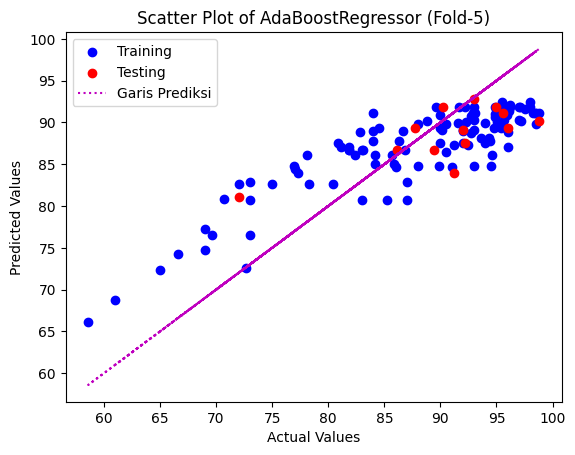

AdaBoostRegressor Fold-6:
MSE: 25.122523711487133
MAE: 4.443411580386384
RMSE: 5.012237395763207
R^2: 0.6865198484743305
------------------


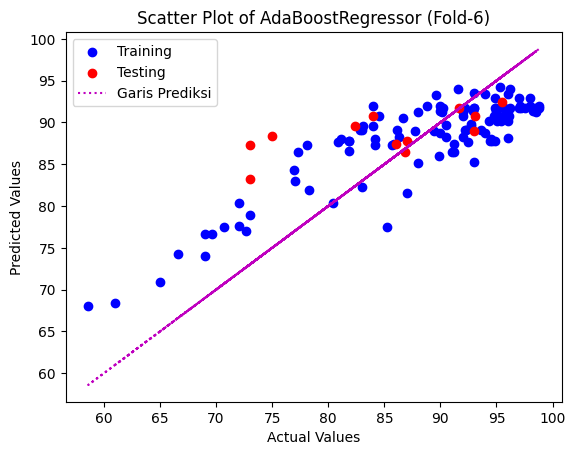

AdaBoostRegressor Fold-7:
MSE: 25.260007660762756
MAE: 4.407126463591506
RMSE: 5.025933511375052
R^2: 0.6750349456652784
------------------


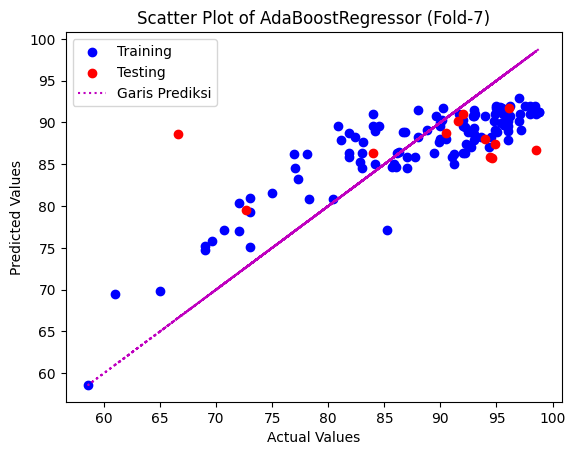

AdaBoostRegressor Fold-8:
MSE: 25.060389335375728
MAE: 4.33417487673156
RMSE: 5.006035291063751
R^2: 0.6871282998229167
------------------


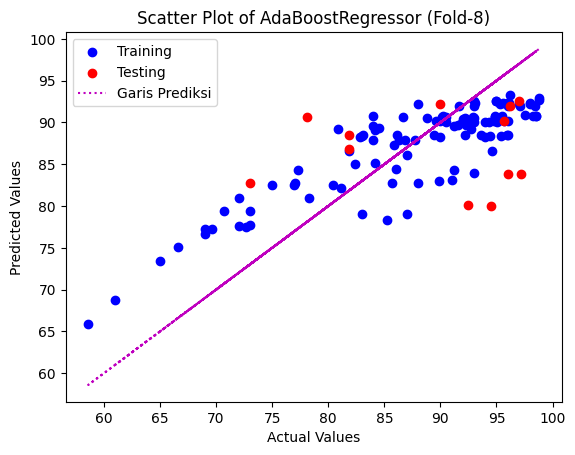

AdaBoostRegressor Fold-9:
MSE: 29.081124808326404
MAE: 4.71169760338268
RMSE: 5.392691796155831
R^2: 0.6394450321509034
------------------


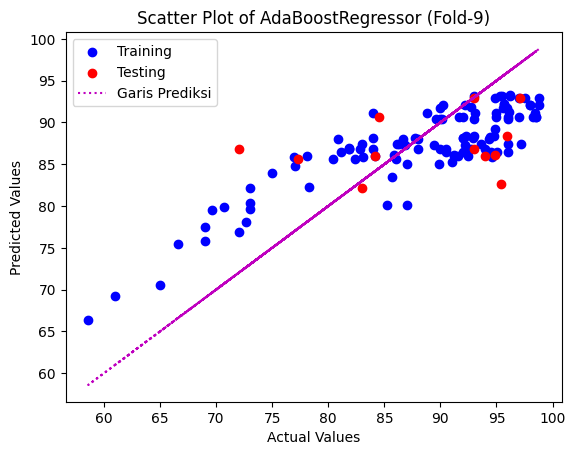

AdaBoostRegressor Fold-10:
MSE: 27.352801908624187
MAE: 4.547586942560102
RMSE: 5.229990622230998
R^2: 0.648261436984631
------------------


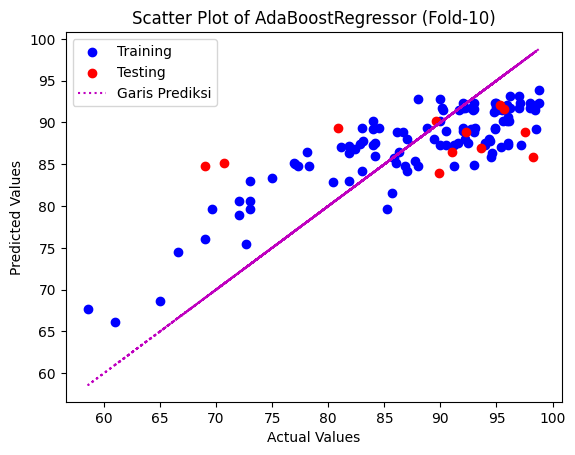

Rata-rata:
Mean MSE: 25.687148834414707
Mean MAE: 4.451248961590618
Mean RMSE: 5.063958385517486
Mean R^2: 0.6747050566034745


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model abr
model_abr = AdaBoostRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_abr.fit(X_train, y_train)
    y_train_pred = model_abr.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_abr.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"AdaBoostRegressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of AdaBoostRegressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")


## Bagging Regressor

BaggingRegressor Fold-1:
MSE: 16.483276589285715
MAE: 2.6739464285714285
RMSE: 4.059960170898936
R^2: 0.7917766667048771
------------------


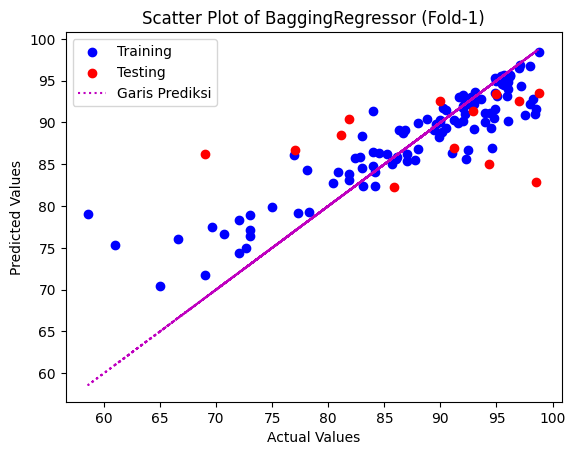

BaggingRegressor Fold-2:
MSE: 12.025731812500002
MAE: 2.6304910714285725
RMSE: 3.4678136934529804
R^2: 0.8511374575570169
------------------


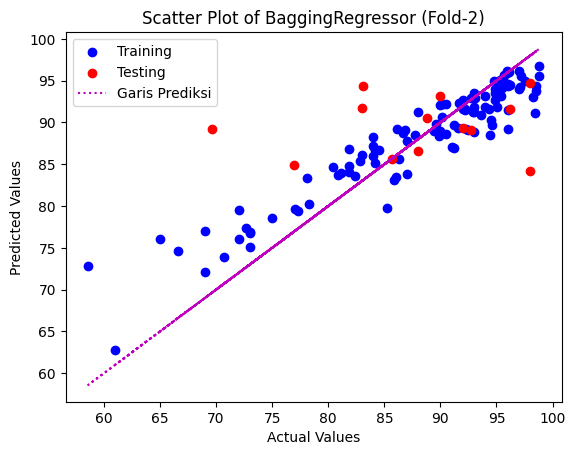

BaggingRegressor Fold-3:
MSE: 12.224707285714297
MAE: 2.5987321428571444
RMSE: 3.4963848880971753
R^2: 0.8330275502306135
------------------


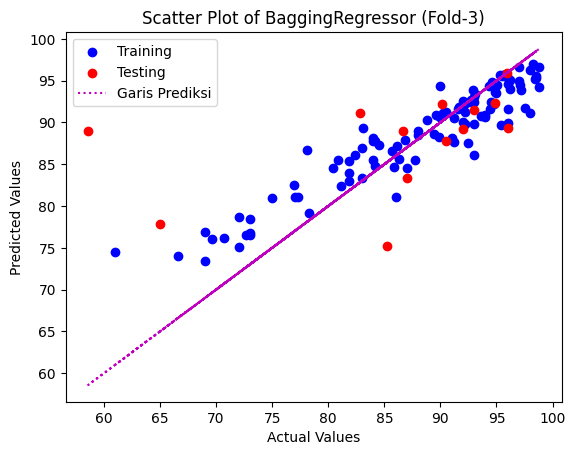

BaggingRegressor Fold-4:
MSE: 14.148065948412698
MAE: 2.881494047619048
RMSE: 3.7613914909794617
R^2: 0.8166798181175476
------------------


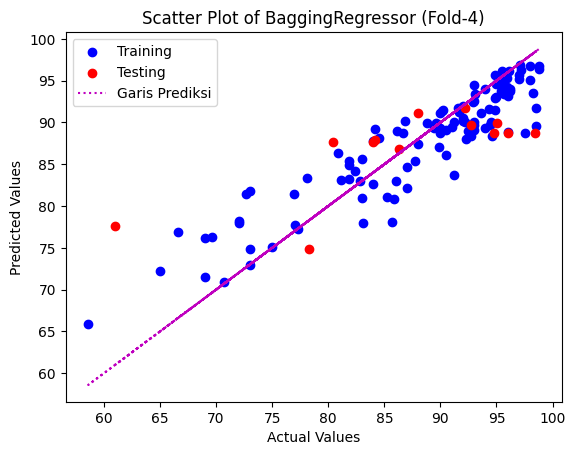

BaggingRegressor Fold-5:
MSE: 17.184293293650803
MAE: 2.8783571428571437
RMSE: 4.145394226566492
R^2: 0.7918500497422405
------------------


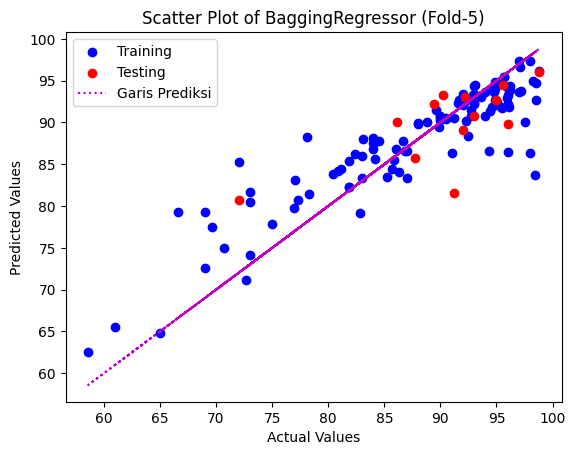

BaggingRegressor Fold-6:
MSE: 10.293092969518197
MAE: 2.427663716814161
RMSE: 3.2082850511633465
R^2: 0.8715622530280671
------------------


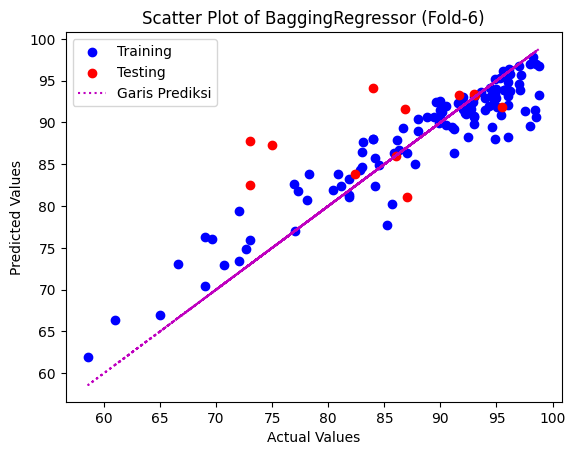

BaggingRegressor Fold-7:
MSE: 14.863189920353978
MAE: 2.7963451327433617
RMSE: 3.855280783594624
R^2: 0.8087879708937005
------------------


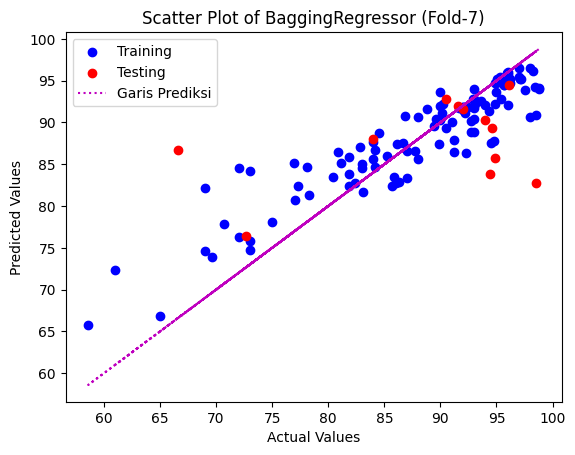

BaggingRegressor Fold-8:
MSE: 11.507994696165197
MAE: 2.447309734513275
RMSE: 3.3923435404105517
R^2: 0.8563260203968384
------------------


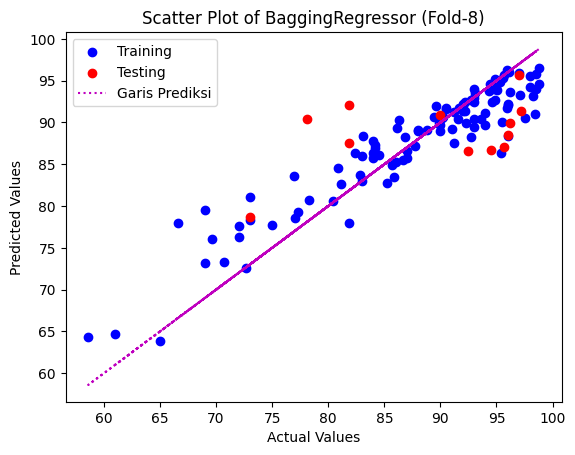

BaggingRegressor Fold-9:
MSE: 15.730598022615537
MAE: 2.760769911504427
RMSE: 3.9661817939443393
R^2: 0.8049681605620944
------------------


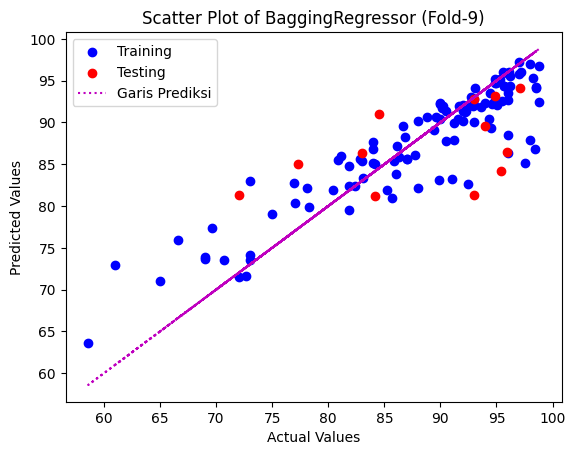

BaggingRegressor Fold-10:
MSE: 13.312539699115046
MAE: 2.6486430678466073
RMSE: 3.648635320104634
R^2: 0.8288097285428224
------------------


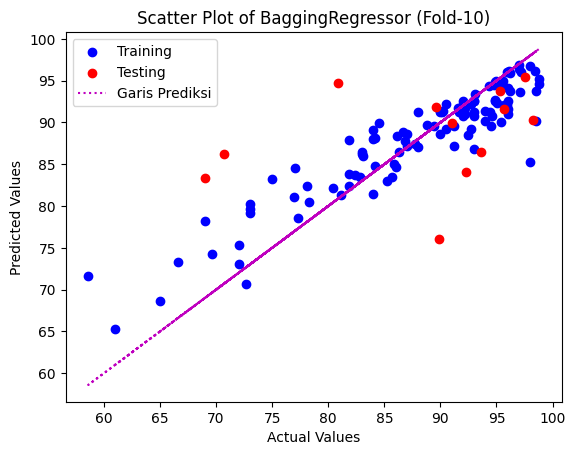

Rata-rata:
Mean MSE: 13.777349023733146
Mean MAE: 2.6743752396755167
Mean RMSE: 3.700167095921254
Mean R^2: 0.8254925675775817


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = df.drop("IE (%)",axis=1)
y = df["IE (%)"]

# Inisialisasi objek KFold untuk data pelatihan
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inisialisasi model br
model_br = BaggingRegressor()

# List untuk menyimpan skor MSE pada setiap iterasi
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Loop melalui setiap iterasi KFold untuk data pelatihan
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluasi model pada data pelatihan
    model_br.fit(X_train, y_train)
    y_train_pred = model_br.predict(X_train)

    # Melakukan prediksi pada data pengujian
    y_test_pred = model_br.predict(X_test)

    # Hitung skor MSE
    mse = mean_squared_error(y_train, y_train_pred)
    mse_scores.append(mse)

    # Hitung skor MAE
    mae = mean_absolute_error(y_train, y_train_pred)
    mae_scores.append(mae)

    # Hitung skor RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Hitung skor R^2 (koefisien determinasi)
    r2 = r2_score(y_train, y_train_pred)
    r2_scores.append(r2)

    # Cetak skor MSE, MAE, RMSE, dan R^2
    print(f"BaggingRegressor Fold-{len(mse_scores)}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("------------------")

    # Buat visualisasi hasil prediksi
    plt.scatter(y_train, y_train_pred, color='b', label='Training')
    plt.scatter(y_test, y_test_pred, color='r', label='Testing')
    plt.plot(y, y, color='m', linestyle='dotted', label='Garis Prediksi')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of BaggingRegressor (Fold-{len(mse_scores)})')  # Modifikasi di sini
    plt.legend()
    plt.show()

# Cetak rata-rata skor MSE, MAE, RMSE, dan R^2
print("Rata-rata:")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R^2: {np.mean(r2_scores)}")
